<center><img src="https://www.sysmex.co.uk/fileadmin/_processed_/a/9/csm_LifeScience_StageImage_BreastCancer_1500x600-01_2498abd1e0.jpg" width="720"></center>



<center><font size=6>Breast Cancer Survival Analysis</font></center>


## Problem Statement

Cancer is the second leading cause of death in the United States, with breast cancer being the most commonly diagnosed cancer [1]. In 2021, the incidence rate of new breast cancer cases was 133.8 per 100,000 people [2]. This dataset provides real-world data on breast cancer patients, specifically those diagnosed with infiltrating duct and lobular carcinoma between 2006 and 2010. The data comes from the November 2017 update of the SEER Program (Surveillance, Epidemiology, and End Results) of the National Cancer Institute (NCI) and includes detailed clinical and demographic information for 4,024 female patients.

By analyzing this dataset, we aim to gain insights into the factors influencing breast cancer prognosis, including tumor characteristics, treatment outcomes, and survival rates. Such analysis can help inform predictive modeling, guide treatment decisions, and improve early detection strategies.



1. https://www.healthline.com/health/leading-causes-of-death#cancer
2. https://gis.cdc.gov/Cancer/USCS/#/AtAGlance/

## Variable Description

1. AGE: Age at diagnosis
2. RACE: Race recode (White, Black, Other) independent of hispanic ethnicity
3. MARITAL STATUS: Marital status at diagnosis
4. T STAGE: Breast Adjusted AJCC 6th T (1988+)
5. N STAGE: Breast Adjusted AJCC 6th N (1988+)
6. 6TH STAGE: Breast Adjusted AJCC 6th Stage(1988+)
7. GRADE: Grading and differentiation codes of 1-4
8. A STAGE: SEER historic stage A, simplified version of stage: in situ, localized, regional, distant, & unknown.
9. TUMOR SIZE: Size of the tumor in millimeters.
10. ESTROGEN STATUS: Estrogen status (Positive / Negative)
11. PROGESTERONE STATUS: Progesterone status (Positive / Negative)
12. REGIONAL NODES EXAMINED: The total number of regional lymph nodes that were removed and examined by the pathologist
13. REGIONAL NODES POSITIVE: The total number of regional lymph nodes that were removed and examined by the pathologist.
14. REGIONAL NODES POSITIVE: The exact number of regional lymph nodes examined by the pathologist that were found to contain metastases.
15. SURVIVAL MONTHS: Number of months of survival months from the patient.
16. STATUS: Survival status of the patient (Alive / Dead)

Data Source: https://ieee-dataport.org/open-access/seer-breast-cancer-data

## Import Necessary Libraries

In [82]:
# Basic core python libraries
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Statistical test libraries
from scipy.stats import mannwhitneyu
from scipy.stats import chi2_contingency

# Scikit-learn model selection and evaluation tools
from sklearn.model_selection import (
   train_test_split,
   cross_val_score,
   StratifiedKFold,
   RandomizedSearchCV,
   cross_validate
)

# Scikit-learn evaluation metrics
from sklearn.metrics import (
   accuracy_score,
   precision_score,
   recall_score,
   f1_score,
   confusion_matrix,
   classification_report,
   make_scorer,
   roc_auc_score
)

# Scikit-learn data preprocessing tools
from sklearn.preprocessing import (
   LabelEncoder,
   OneHotEncoder,
   OrdinalEncoder,
   StandardScaler
)

# Scikit-learn machine learning models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import (
   BaggingClassifier,
   RandomForestClassifier,
   AdaBoostClassifier,
   GradientBoostingClassifier,
   StackingClassifier,
   HistGradientBoostingClassifier
)

# External gradient boosting libraries
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Imbalanced data handling tools
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import SMOTENC, RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler, TomekLinks, EditedNearestNeighbours
from imblearn.combine import SMOTEENN, SMOTETomek

# Column transformer tool
from sklearn.compose import ColumnTransformer

# Dimensionality reduction and visualization tools
from sklearn.manifold import TSNE
import umap

# Model interpretability tool
import shap

# Utilities
from sklearn.base import clone
warnings.filterwarnings('ignore')

## Checking the Dataset

In [3]:
# Load the dataset from google drive
data = pd.read_csv('/content/SEER Breast Cancer Dataset.csv')

In [4]:
# Copy the original data
df = data.copy()

In [5]:
# The dataset has 4024 rows and 16 columns
df.shape

(4024, 16)

In [6]:
# Check 5 random samples from the data
df.sample(n = 5, random_state = 1)

,Age,Race,Marital Status,Unnamed: 3,T Stage,N Stage,6th Stage,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
486,57,Black,Separated,NaN,T2,N3,IIIC,Poorly differentiated; Grade III,Regional,40,Negative,Negative,36,35,48,Dead
2748,63,White,Married (including common law),NaN,T2,N1,IIB,Moderately differentiated; Grade II,Regional,23,Positive,Positive,19,1,85,Alive
2290,48,White,Married (including common law),NaN,T3,N1,IIIA,Well differentiated; Grade I,Regional,80,Positive,Positive,22,3,78,Alive
957,61,White,Widowed,NaN,T3,N1,IIIA,Moderately differentiated; Grade II,Regional,90,Positive,Positive,13,1,56,Alive
3252,48,White,Divorced,NaN,T4,N1,IIIB,Poorly differentiated; Grade III,Regional,19,Positive,Positive,6,1,94,Alive


In [7]:
# Check the information on the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Age                     4024 non-null   int64  
 1   Race                    4024 non-null   object 
 2   Marital Status          4024 non-null   object 
 3   Unnamed: 3              0 non-null      float64
 4   T Stage                 4024 non-null   object 
 5   N Stage                 4024 non-null   object 
 6   6th Stage               4024 non-null   object 
 7   Grade                   4024 non-null   object 
 8   A Stage                 4024 non-null   object 
 9   Tumor Size              4024 non-null   int64  
 10  Estrogen Status         4024 non-null   object 
 11  Progesterone Status     4024 non-null   object 
 12  Regional Node Examined  4024 non-null   int64  
 13  Reginol Node Positive   4024 non-null   int64  
 14  Survival Months         4024 non-null   

* The Unnamed: 3 column must be dropped as it is a pure null variable.
* Other columns seems fine as they do not have any null values.

In [8]:
# Fix the column space if needed
df.columns = df.columns.str.strip()

In [9]:
# Drop the Unnmaed: 3 column
df.drop(columns = 'Unnamed: 3', inplace = True)
df.columns

Index(['Age', 'Race', 'Marital Status', 'T Stage', 'N Stage', '6th Stage',
       'Grade', 'A Stage', 'Tumor Size', 'Estrogen Status',
       'Progesterone Status', 'Regional Node Examined',
       'Reginol Node Positive', 'Survival Months', 'Status'],
      dtype='object')

In [10]:
# Check for sure if there is no null values
df.isnull().sum()

,0
Age,0
Race,0
Marital Status,0
T Stage,0
N Stage,0
6th Stage,0
Grade,0
A Stage,0
Tumor Size,0
Estrogen Status,0


* There are no null values in the data.

In [11]:
# Check the duplicated samples
df.duplicated().sum()

np.int64(1)

* There is 1 duplicated sample.

In [12]:
# Drop the duplicated sample
df.drop_duplicates(inplace = True)
df.duplicated().any()

np.False_

* No duplication in the data.

In [13]:
obj_cols = df.select_dtypes(include = 'object').columns.to_list()

for col in obj_cols:
  df[col] = df[col].astype('category')

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4023 entries, 0 to 4023
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Age                     4023 non-null   int64   
 1   Race                    4023 non-null   category
 2   Marital Status          4023 non-null   category
 3   T Stage                 4023 non-null   category
 4   N Stage                 4023 non-null   category
 5   6th Stage               4023 non-null   category
 6   Grade                   4023 non-null   category
 7   A Stage                 4023 non-null   category
 8   Tumor Size              4023 non-null   int64   
 9   Estrogen Status         4023 non-null   category
 10  Progesterone Status     4023 non-null   category
 11  Regional Node Examined  4023 non-null   int64   
 12  Reginol Node Positive   4023 non-null   int64   
 13  Survival Months         4023 non-null   int64   
 14  Status                  4023 

## Data Description

### Numeric Columns

In [14]:
# Description of the data (numeric columns)
df.describe()

,Age,Tumor Size,Regional Node Examined,Reginol Node Positive,Survival Months
count,4023.000000,4023.000000,4023.000000,4023.000000,4023.000000
mean,53.969923,30.477007,14.358439,4.158837,71.301765
std,8.963118,21.121253,8.100241,5.109724,22.923009
min,30.000000,1.000000,1.000000,1.000000,1.000000
25%,47.000000,16.000000,9.000000,1.000000,56.000000
50%,54.000000,25.000000,14.000000,2.000000,73.000000
75%,61.000000,38.000000,19.000000,5.000000,90.000000
max,69.000000,140.000000,61.000000,46.000000,107.000000


### Observations:

**Age**:

* **Average**: The mean age of patients is approximately **54 years**, with a minimum age of 30 and a maximum of 69.
* **Distribution**: Most patients are over the age of **47**. The median age is **54**, indicating a relatively balanced distribution around the mean.

**Tumor Size**:

* **Average**: The average tumor size is around 30 millimeters.
* **Distribution**: The 75th percentile shows a tumor size of 38 millimeters**, while the maximum size is 140 millimeters. This indicates that most tumors are relatively smaller, but a notable proportion of patients have tumors significantly larger than average.

**Regional Nodes Examined**:

* **Average**: The mean number of **regional nodes examined is about 14.
* **Distribution**: The 25th percentile shows 9 nodes examined, while the 75th percentile shows 19 nodes. The maximum is 61, indicating that, for some patients, a much larger number of lymph nodes were examined. This could point to more extensive staging or clinical decision-making for certain cases.

**Regional Nodes Positive**:

* **Average**: The average number of regional nodes positive is 4.16.
* **Distribution**: The median value is 2, while the 75th percentile shows 5. The maximum is 46, which indicates that for some patients, cancer has spread to a significant number of lymph nodes, possibly indicating a more advanced stage of cancer.

**Survival Months**:

* **Average**: The average survival time for patients is 71 months.
* **Distribution**: The 25th percentile survival time is 56 months, while the 75th percentile is 90 months, showing a clear difference in the survival period for a large portion of patients. The maximum survival time of 107 months suggests that some patients have a longer survival time, even after being diagnosed with breast cancer.

---

**Key Insights**:

* Tumor Size and Regional Node Involvement show a positive skew, with a small number of patients having very large tumors or many involved lymph nodes. This suggests that the majority of patients have smaller tumors and fewer affected nodes, but a significant subset of patients have more aggressive cancers.

* Survival Time increases with the 75th percentile and maximum values, indicating that patients with fewer regional nodes positive and smaller tumors tend to live longer, while those with more aggressive cancer stages (larger tumors and more nodes involved) have shorter survival times.

### Categorical Columns

In [15]:
for col in df.columns:
  if df[col].dtype == 'category':
    print(df[col].value_counts(1))
    print('-' * 50)

Race
White                                                        0.848123
Other (American Indian/AK Native, Asian/Pacific Islander)    0.079543
Black                                                        0.072334
Name: proportion, dtype: float64
--------------------------------------------------
Marital Status
Married (including common law)    0.656724
Single (never married)            0.152871
Divorced                          0.120805
Widowed                           0.058414
Separated                         0.011186
Name: proportion, dtype: float64
--------------------------------------------------
T Stage
T2    0.443947
T1    0.398210
T3    0.132488
T4    0.025354
Name: proportion, dtype: float64
--------------------------------------------------
N Stage
N1    0.678847
N2    0.203828
N3    0.117325
Name: proportion, dtype: float64
--------------------------------------------------
6th Stage
IIA     0.324136
IIB     0.280885
IIIA    0.260999
IIIC    0.117325
IIIB    0.016654
Nam

### Observations:

* **Race**: The dataset has a predominantly White patient population.
* **Marital Status**: The majority are married, indicating potential stress might be a risk factor for breast cancer.
* **Tumor and Cancer Staging**: Most patients have early to moderate-stage cancer, with fewer in advanced stages.
* **Hormone Receptor Status**: A significant proportion of cancers are estrogen and progesterone receptor-positive.

## EDA (Exploratory Data Analysis)

In [16]:
# Change the wrong spelling of the column
df.rename(columns = {'Reginol Node Positive': 'Regional Node Positive'}, inplace = True)

In [17]:
# Rename categories in 'Race' column
df['Race'] = df['Race'].cat.rename_categories({'Other (American Indian/AK Native, Asian/Pacific Islander)': 'Other'})

# Rename categories in 'Marital Status' column
df['Marital Status'] = df['Marital Status'].cat.rename_categories({'Married (including common law)': 'Married',
                                                                 'Single (never married)': 'Single'})

# Rename categories in 'Grade' column
df['Grade'] = df['Grade'].cat.rename_categories({'Well differentiated; Grade I': 'Grade I',
                                                 'Moderately differentiated; Grade II': 'Grade II',
                                                 'Poorly differentiated; Grade III': 'Grade III',
                                                 'Undifferentiated; anaplastic; Grade IV': 'Grade IV'})

### Univariate Analysis

### a) Numeric Features

In [18]:
# Function to plot histogram and boxplot for numeric columns
def hist_boxplot(var, figsize = (10, 8)):
    """
    Visualizes a histogram and boxplot for a given numeric variable.

    Parameters:
    - var: Column name of the numeric variable.
    - figsize: Size of the combined plot set to default.

    Output:
    - Combined boxplot and histogram.
    """

    # Create subplot with 2 combined plots: boxplot & histogram
    fig, (ax_box, ax_hist) = plt.subplots(
        nrows = 2, sharex = True, figsize = figsize,
        gridspec_kw = {'height_ratios': (0.25, 0.75)}
    )

    # Visualize boxplot
    sns.boxplot(data = df, x = var, showmeans = True, ax = ax_box)

    # Visualize histogram
    sns.histplot(data = df, x = var, kde = True, ax = ax_hist)
    ax_hist.axvline(df[var].median(), color = 'black', linestyle = '--', label = 'Median')
    ax_hist.axvline(df[var].mean(), color = 'red', linestyle = '--', label = 'Mean')

    # Improve layout and display
    plt.tight_layout()
    ax_hist.legend()
    plt.show()

**Age**

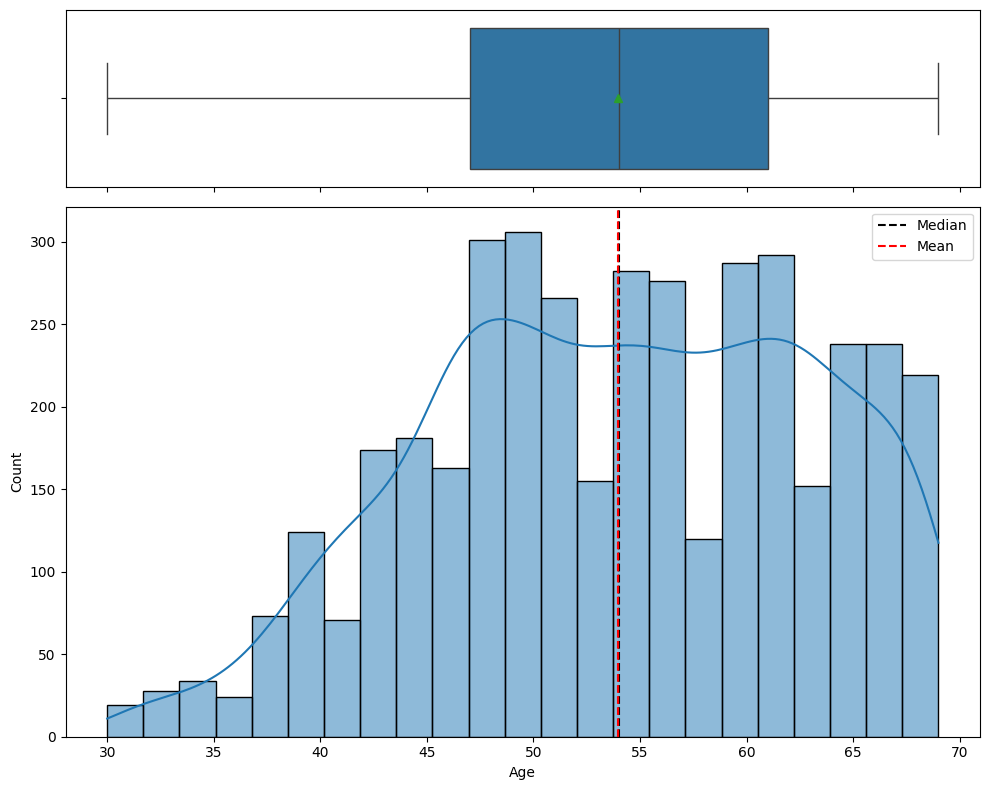

In [19]:
hist_boxplot('Age')

* Both median and mean age is close to 55.

* The majority of patients are between the age of 48 to 60, indicating age may be a significant risk factor for breast cancer.

**Tumor Size**

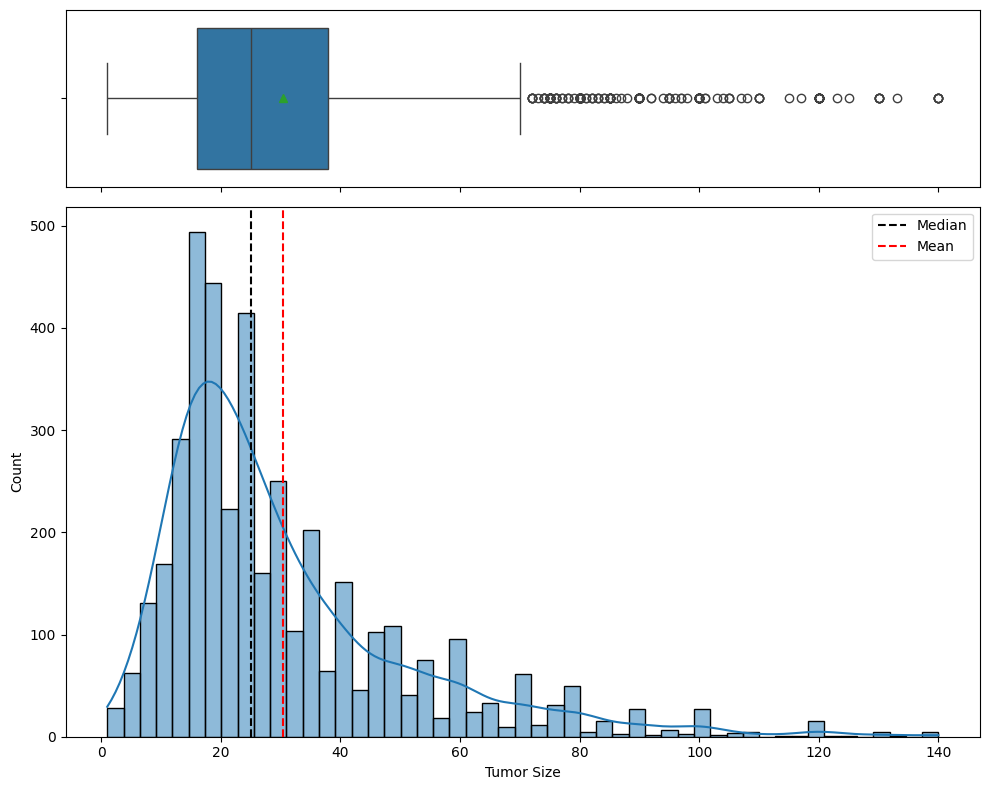

In [20]:
hist_boxplot('Tumor Size')

* There are some outliers for tumor size over 60, these patients are likely dead patients.

* The majority of patients have tumor size from 16 to 38, indicating size of the tumor for dead patients may be much bigger than alive patients.

**Regional Node Examined**

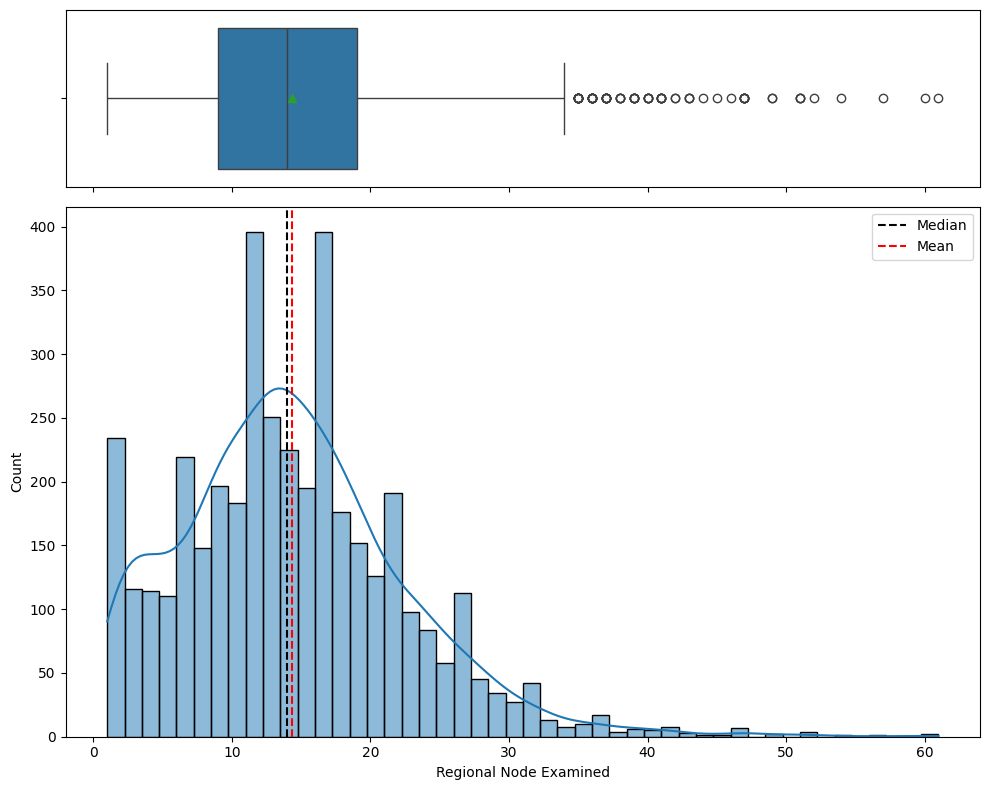

In [21]:
hist_boxplot('Regional Node Examined')

* The majority of patients have regional node examined from approximately 9 to 19, some patients have over 40 nodes examined.

* Since the 'Regional node examined' means the total number of lymph nodes surgically removed and examined regardless of whether they have cancer, the larger number of examined node does not directly imply that patient is dead.

**Regional Node Positive**

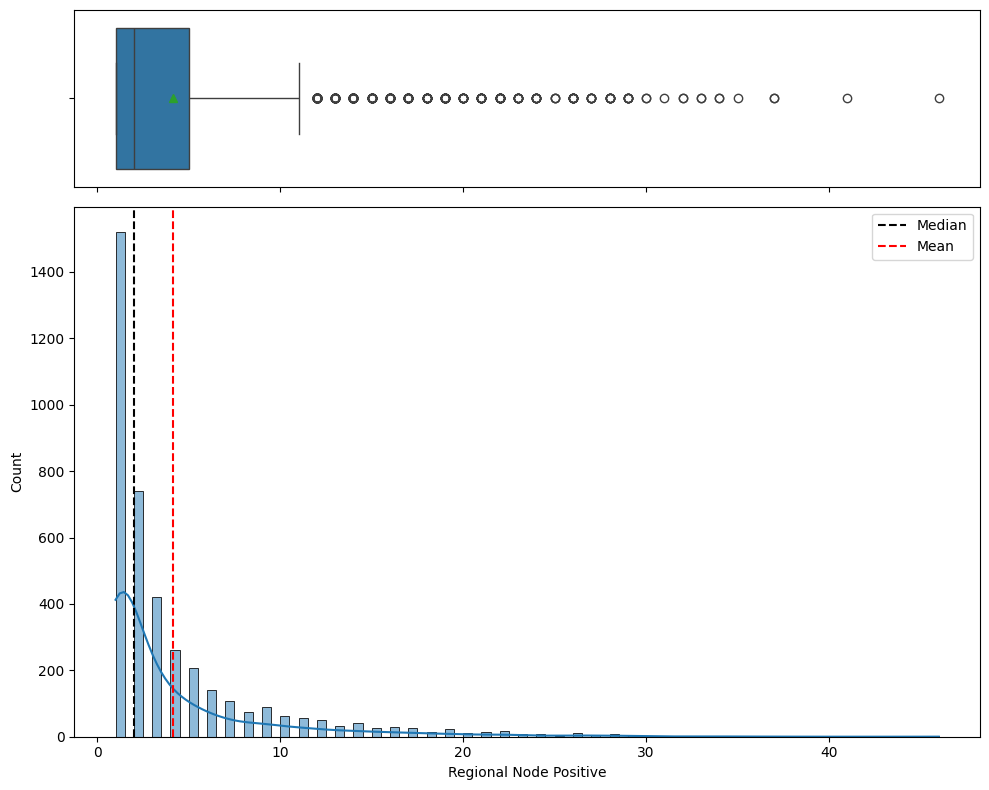

In [22]:
hist_boxplot('Regional Node Positive')

* The vast majority of the patients have relatively small number of positve regional nodes under 10 while there are patients with over 40 positive nodes, implying dead patients may have more positive nodes than others.

**Survival Months**

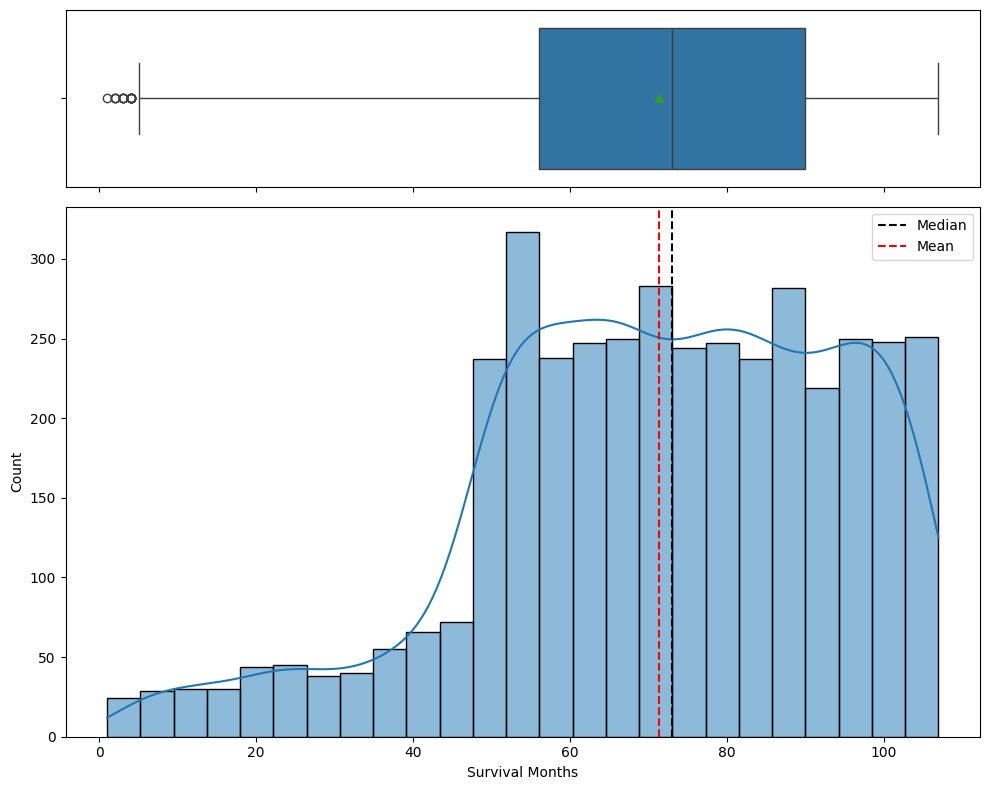

In [23]:
hist_boxplot('Survival Months')

* The majority of patients survive approximately 55 to 90 months.

* There is a steep increase after approximatley 50 months, indicating alive patients may generally live more than 50 months.

### b) Categorical Features

In [24]:
# Function to display a countplot with percentage labels for a categorical variable
def labeled_barplot(var):
    """
    Visualizes a labeled barplot with percentage for a given categorical variable.

    Parameters:
    - var: Column name of the categorical variable for visualization.

    Output:
    - A barplot with counts and percentage labels.
    """

    # Get the number of values in the variable and set the figure size
    count = df[var].nunique()
    plt.figure(figsize=(count + 3, 6))

    # Visualize the countplot
    ax = sns.countplot(data=df, x = var, order = df[var].value_counts().index[:],
                       palette = 'viridis', hue = var)

    # Total number of values in the feature to calculate percentages
    total = len(df[var])

    # Add percentage labels on top for each bar
    for p in ax.patches:
        # Calculate percentage of each category
        label = '{:.1f}%'.format(100 * p.get_height() / total)

        # Get the x and y coordinates for percentage label
        x = p.get_x() + p.get_width() / 2
        y = p.get_height()

        # Annotate the plot with the percentage label
        ax.annotate(label, (x, y), ha = 'center', va = 'center',
                    xytext = (0, 6), size = 12, textcoords = 'offset points')

    # Show the final plot
    plt.show()

**Race**

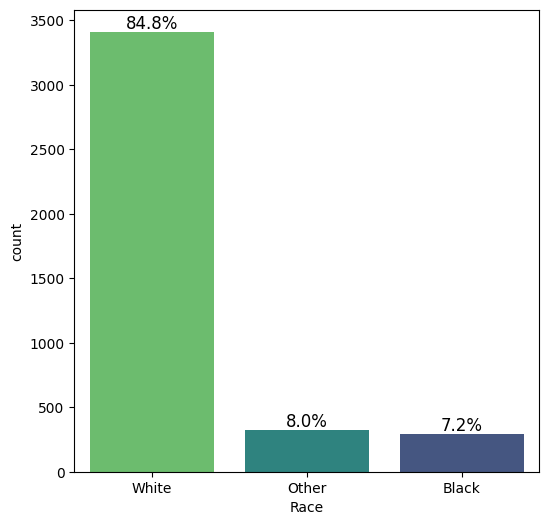

In [25]:
labeled_barplot('Race')

* Among the breast cancer patients (dead or alive), white population shows dominating figure, indicating white race may be more vulnerable than other races.

**Marital Status**

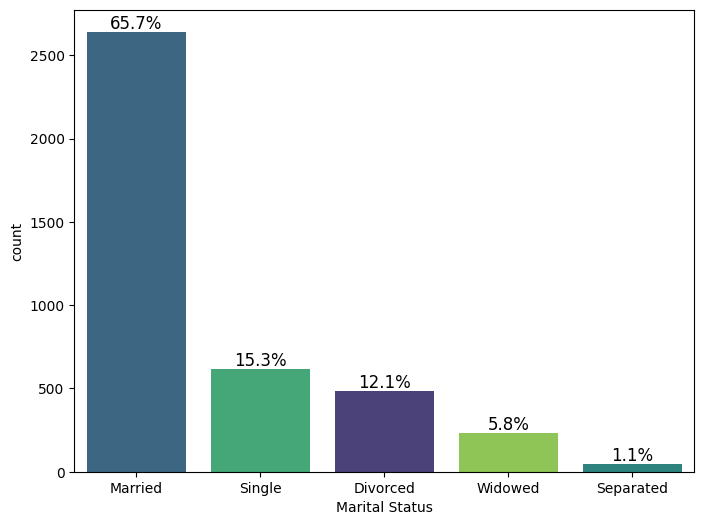

In [26]:
labeled_barplot('Marital Status')

* Among the breast cancer patients (dead or alive), married women seems to be dominating figure, implying breast cancer may have coorelation from the stress from the marriage.

**T Stage**

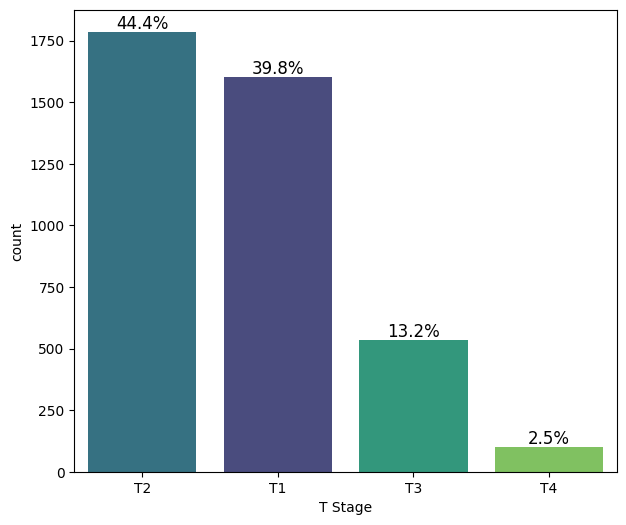

In [27]:
labeled_barplot('T Stage')

* The vast majority of T stages over 80 percent are in T1 and T2 stage.

* Very few patients are in the advanced T4 stage.

**N Stage**

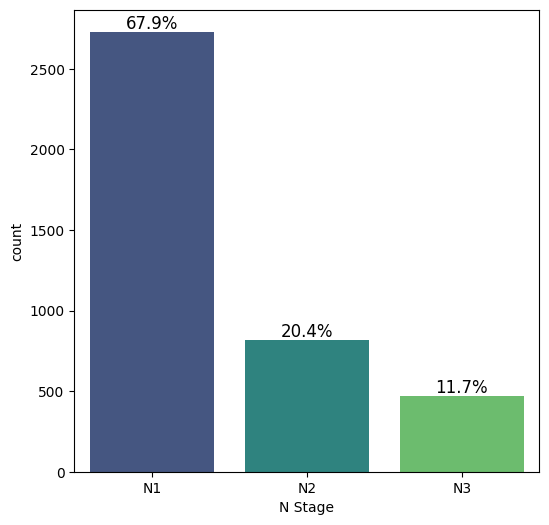

In [28]:
labeled_barplot('N Stage')

* N1 is most common, possibly indicating limited node involvement on the alive patients.

**6th Stage**

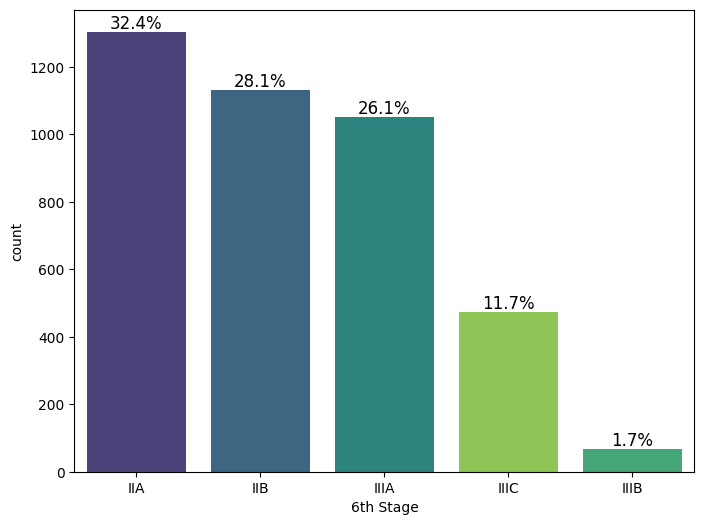

In [29]:
labeled_barplot('6th Stage')

* Most patients are in intermediate stage cancer such as Stage IIA, IIB, or IIIA.

**Grade**

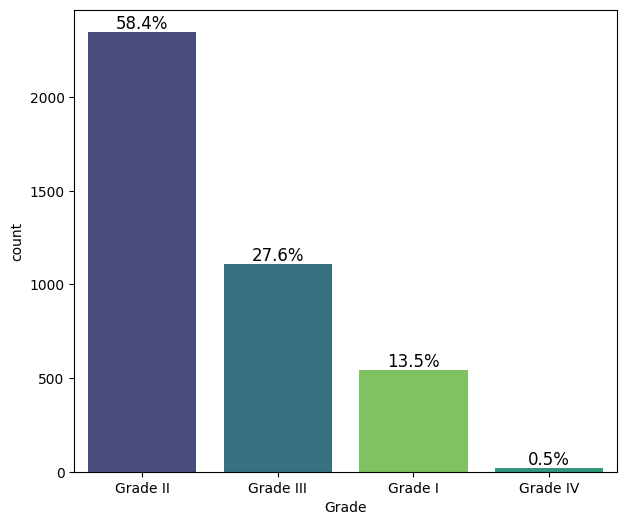

In [30]:
labeled_barplot('Grade')

* The majority of tumors are moderately differentiated (Grade II).

* Undifferentiated (Grade IV) is rare with 0.5 percent.

**A Stage**

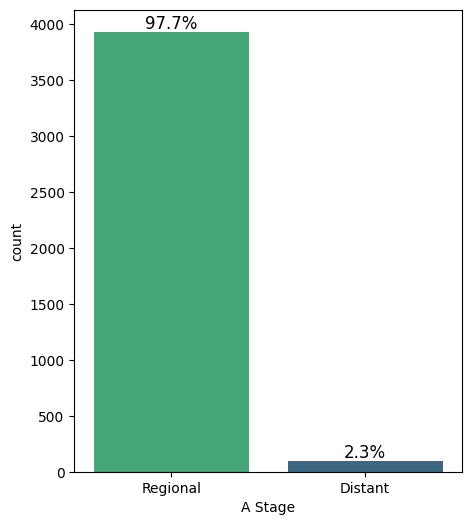

In [31]:
labeled_barplot('A Stage')

* The vast majority of 97.7 percent are regional cases, meaning the spread of cancer to nearby tissues.

**Estrogen Status**

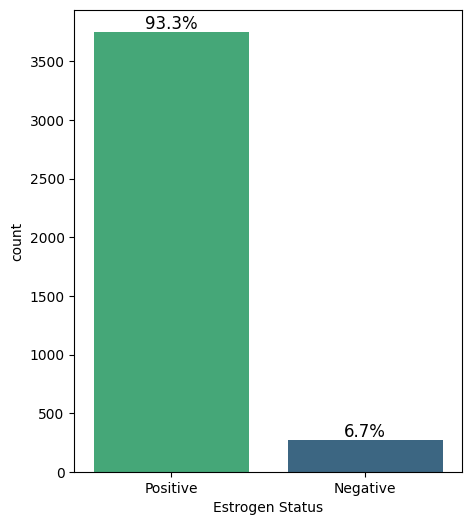

In [32]:
labeled_barplot('Estrogen Status')

* 93.3 percent of tumors are ER-positive, suggesting strong possibility for hormone therapy for patients.

**Progesterone Status**

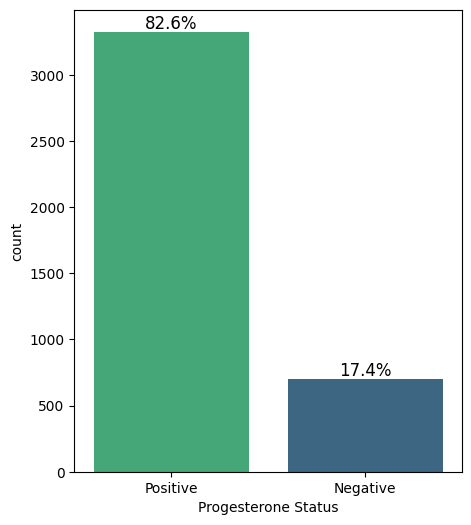

In [33]:
labeled_barplot('Progesterone Status')

* 82.7 percent are PR-positive, consistent with favorable hormonal therapy.

**Status**

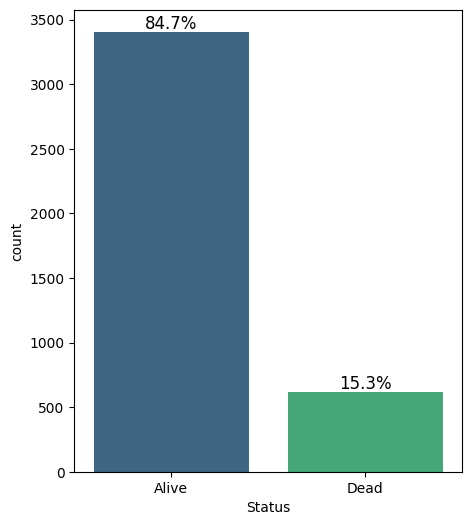

In [34]:
labeled_barplot('Status')

* The target variable of the dataset, showing the imbalanceness of the data.

### Bivariate Analysis

* In order to see the correlation between the target variable (Status) and other predictors, we will conduct visual bivairate analysis.

### a) Numeric Features & Status

In [38]:
# Function to plot correlation between status and numeric variables
def distribution_plot(predictor, target):
  """
  Visualizes the distribution of a numeric variable (predictor) across different classes of the target variable.

  Parameters:
  - predictor: Name of the numeric predictor variable.
  - target: Name of the binary target variable (Status).

  Output:
  - Histogram for Alive group
  - Histogram for Dead group
  - Boxplot with outliers
  - Boxplot without outliers
  """
  # Create subplots with specified figure size
  fig, axs = plt.subplots(nrows = 2, ncols = 2, figsize = (12, 8))

  # Extract unique classes (alive / dead) from the target variable
  target_uniq = df[target].unique()

  # Histogram of predictor that counts alive patients
  axs[0, 0].set_title(f'Histogram Distribution of {target} (Alive)')
  sns.histplot(data = df[df[target] == target_uniq[0]], x = predictor, kde = True, ax = axs[0, 0], color = 'teal', stat = 'density')

  # Histogram of predictor that counts dead patients
  axs[0, 1].set_title(f'Histogram Distribution of {target} (Dead)')
  sns.histplot(data = df[df[target] == target_uniq[1]], x = predictor, kde = True, ax = axs[0, 1], color = 'orange', stat = 'density')

  # Boxplot of predictor and target with outliers
  axs[1, 0].set_title(f'Boxplot of {target} by {predictor}')
  sns.boxplot(data = df, x = target, y = predictor, ax = axs[1, 0], palette = 'pastel', hue = target, legend = False, showmeans = True)

  # Boxplot of predictor and target without outliers
  axs[1, 1].set_title(f'Boxplot of {target} by {predictor} without outliers')
  sns.boxplot(data = df, x = target, y = predictor, ax = axs[1, 1], palette = 'pastel', showfliers = False, hue = target, legend = False, showmeans = True)

  # Improve layout and display
  plt.tight_layout()
  plt.show()

**Age & Status**

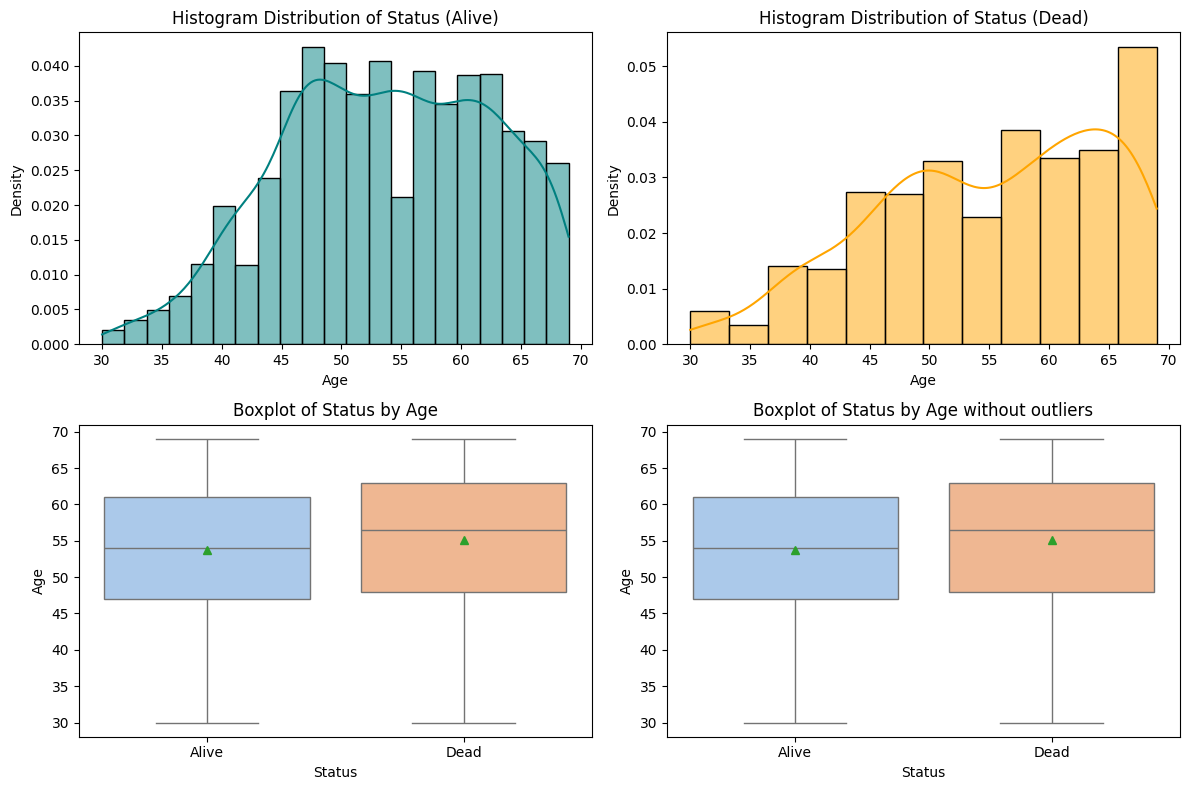

In [39]:
distribution_plot('Age', 'Status')

* Both groups show growth after age 40.

* Median and mean age are slightly higher in the dead group.

* No significant outliers.

**Tumor Size & Status**

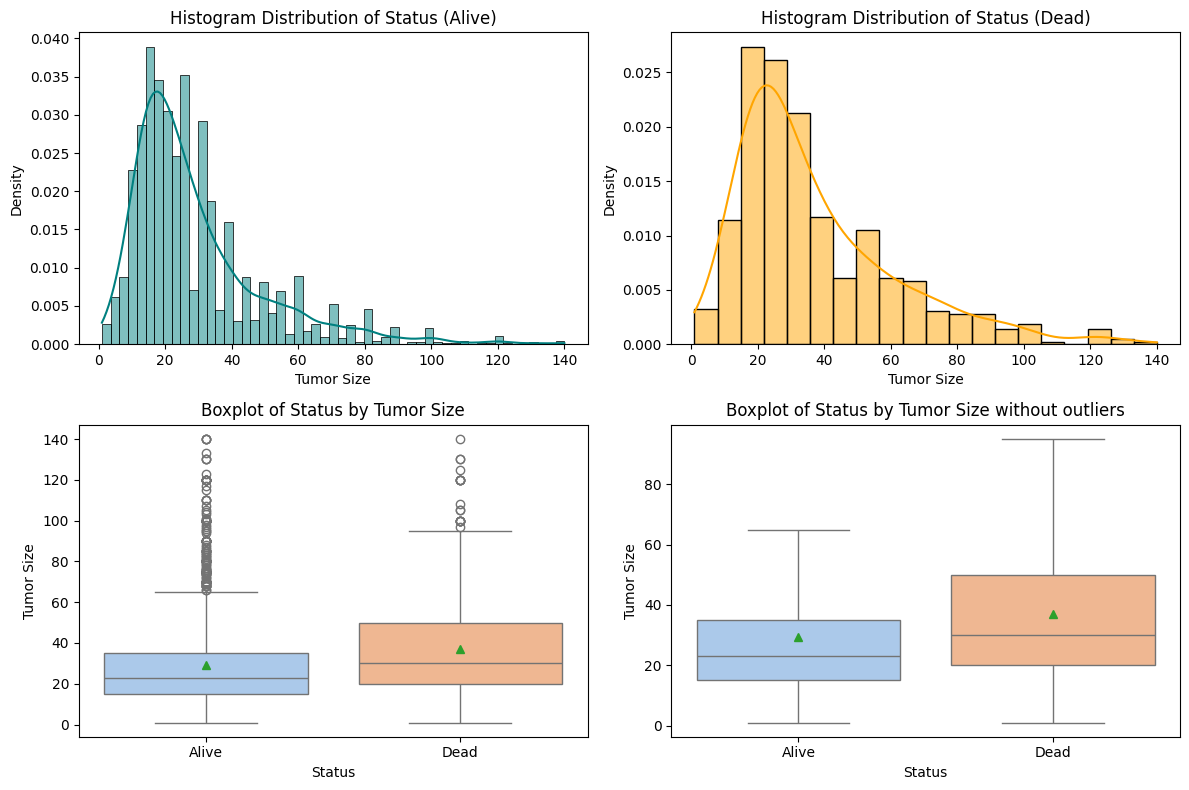

In [40]:
distribution_plot('Tumor Size', 'Status')

* Alive patients have smaller tumor sizes, peaking around 15–20 mm and dead patients tend to have larger tumors.

* Median and mean tumor size are both higher in the dead group, indicating larger tumor sizes overall.

* The Alive group has many outliers, but the majority of the values remain lower than the dead group.

**Regional Node Examined vs Status**

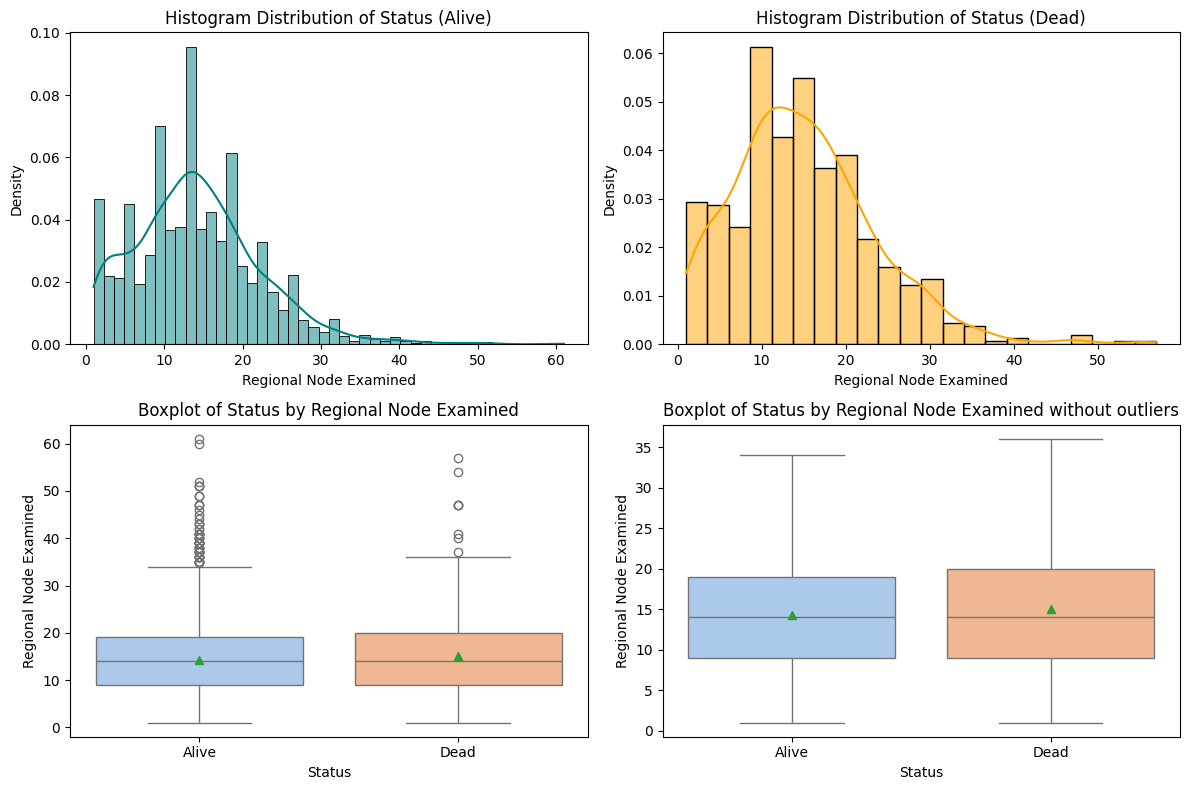

In [41]:
distribution_plot('Regional Node Examined', 'Status')

* Both groups are right-skewed, with majority of patients having 10–20 nodes examined.

* Dead patients slightly more often had more nodes examined.

* Distribution is similar, but the Alive group has more high outliers.

**Regional Node Positive & Status**

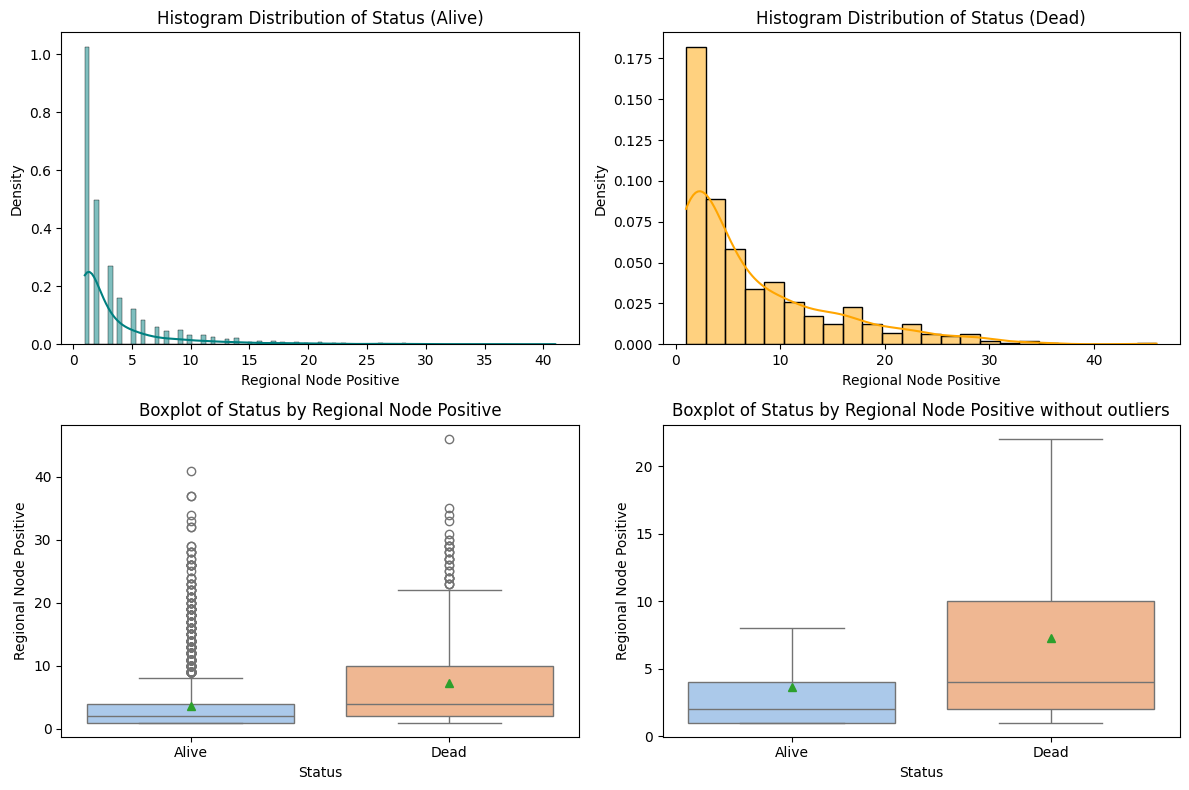

In [42]:
distribution_plot('Regional Node Positive', 'Status')

* Alive patients mostly have 5- positive nodes and dead patients show a wider spread, having more 5+ positive nodes.

* Median, mean, and upper range are all higher in the dead group.

**Survival Months vs Status**

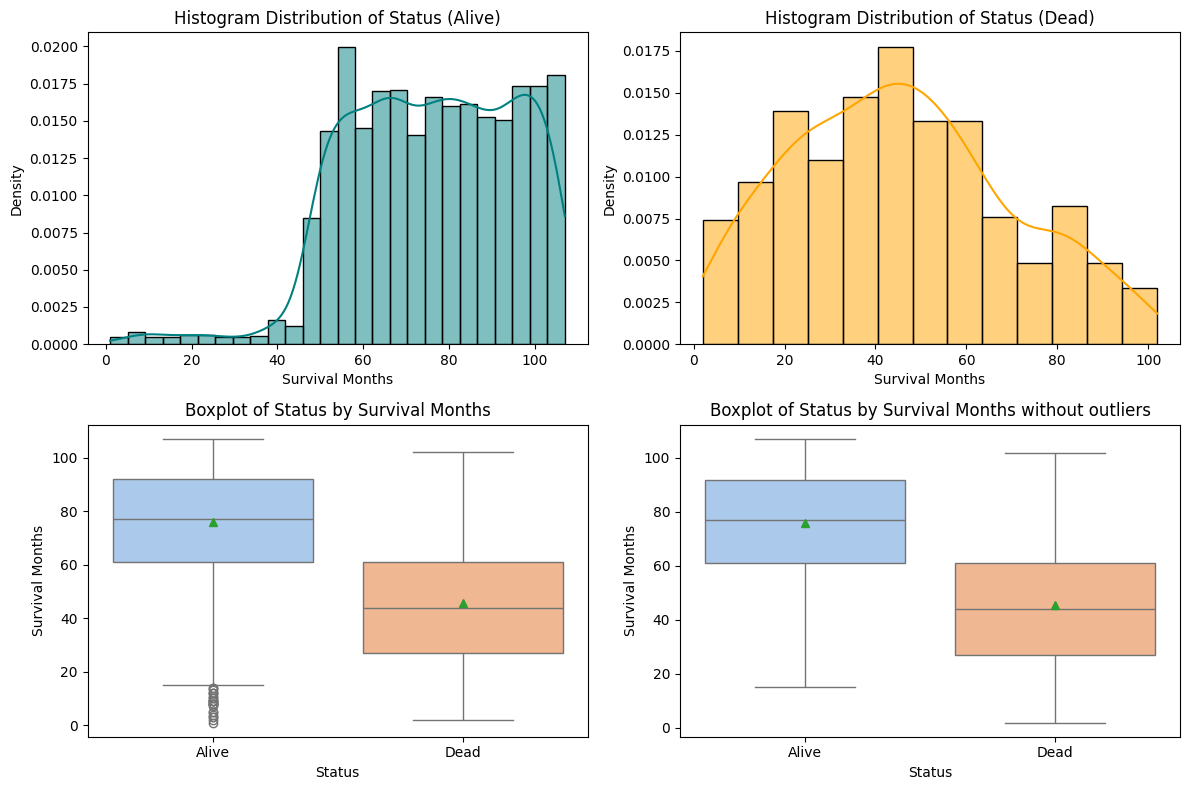

In [43]:
distribution_plot('Survival Months', 'Status')

* Alive patients have consistently high survival durations, mostly 60+ months, with a sharp rise after 40 months.

* Dead patients peak around 40–60 months and decline, showing shorter overall survival.

* Alive group has higher median and mean survival.

### b) Categorical Features & Status

In [44]:
# Function to plot the correlation status and categorical variables
def stacked_barplot(predictor, target):
    """
    Plots a stacked bar chart showing the distribution of a categorical predictor
    variable across the target variable.

    Parameters:
    - predictor: Name of the categorical predictor variable.
    - target: Name of the binary target variable (Status).

    Output:
    - Frequency table of predictor vs. target
    - Normalized stacked bar plot
    """
    # Number of unique categories in the predictor
    count = df[predictor].nunique()

    # Identify the minority class to sort the plot accordingly
    sorter = df[target].value_counts().index[-1]

    # Print frequency table
    freq_table = pd.crosstab(df[predictor], df[target], margins = True).sort_values(by = sorter, ascending = False)
    print(freq_table, '\n')

    # Normalized table for plotting
    normalized_table = pd.crosstab(df[predictor], df[target], normalize = 'index').sort_values(by = sorter, ascending = False)

    # Set up figure size dynamically
    plt.figure(figsize = (count + 4, 5))

    # Generate the stacked barplot
    ax = normalized_table.plot(kind = 'bar', stacked = True)

    # Display djustments
    plt.title(f"Distribution of {target} by {predictor}")
    plt.xlabel(predictor)
    plt.ylabel("Proportion")
    plt.xticks(rotation = 0)
    plt.legend(title = target, loc = 'upper left', bbox_to_anchor = (1, 1))
    plt.subplots_adjust(right = 0.8)

    # Improve layout and display
    plt.tight_layout()
    plt.show()

**Race & Status**

Status  Alive  Dead   All
Race                     
All      3407   616  4023
White    2902   510  3412
Black     218    73   291
Other     287    33   320 



<Figure size 700x500 with 0 Axes>

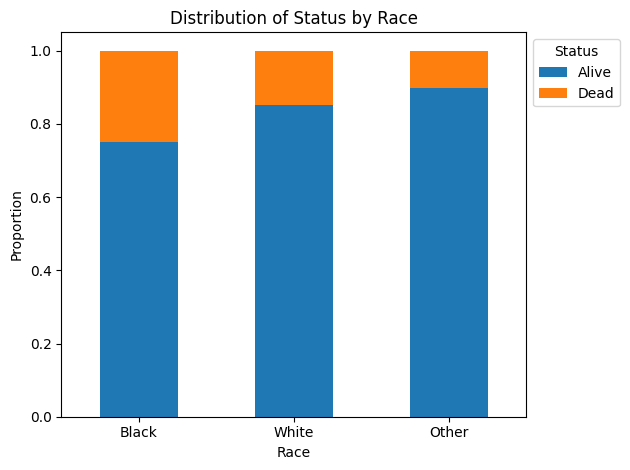

In [45]:
stacked_barplot('Race', 'Status')

* All groups show majority of patients are alive.

* Black patients have a higher proportion of deaths compared to other groups.

**Marital Status & Status**

Status          Alive  Dead   All
Marital Status                   
All              3407   616  4023
Married          2284   358  2642
Single            511   104   615
Divorced          396    90   486
Widowed           186    49   235
Separated          30    15    45 



<Figure size 900x500 with 0 Axes>

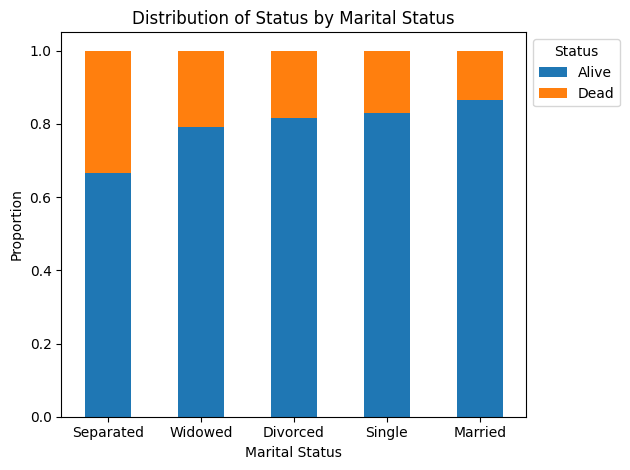

In [46]:
stacked_barplot('Marital Status', 'Status')

* Married patients show the highest survival proportion.

* Separated and widowed individuals have notably higher death rates, suggesting lack of social/family support may impact survival.

**T Stage & Status**

Status   Alive  Dead   All
T Stage                   
All       3407   616  4023
T2        1483   303  1786
T1        1445   157  1602
T3         417   116   533
T4          62    40   102 



<Figure size 800x500 with 0 Axes>

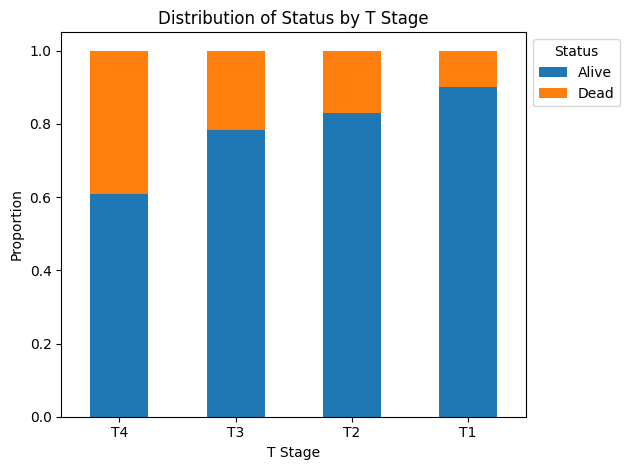

In [47]:
stacked_barplot('T Stage', 'Status')

* T4 stage shows approximatley 40 percent of death rate.

* Mortality rate increases with higher T stages, suggesting strong correlation between T Stage and Status.

**N Stage & Status**

Status   Alive  Dead   All
N Stage                   
All       3407   616  4023
N1        2461   270  2731
N3         291   181   472
N2         655   165   820 



<Figure size 700x500 with 0 Axes>

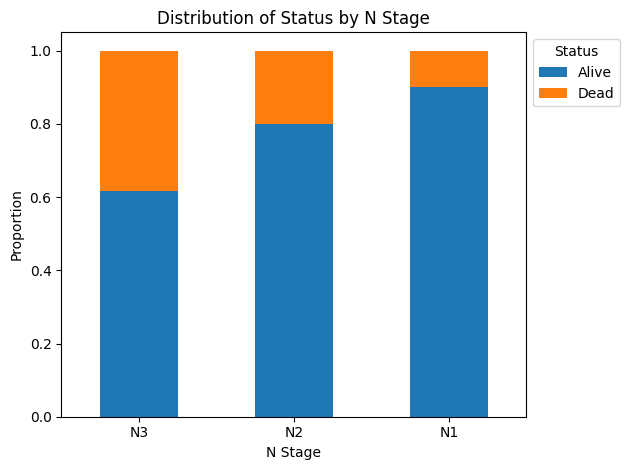

In [48]:
stacked_barplot('N Stage', 'Status')

* N3 stage shows approximatley 40 percent of death rate.

* Mortality rate increases with higher N stages, suggesting strong correlation between N Stage and Status.

**6th Stage & Status**

Status     Alive  Dead   All
6th Stage                   
All         3407   616  4023
IIIA         866   184  1050
IIIC         291   181   472
IIB          995   135  1130
IIA         1208    96  1304
IIIB          47    20    67 



<Figure size 900x500 with 0 Axes>

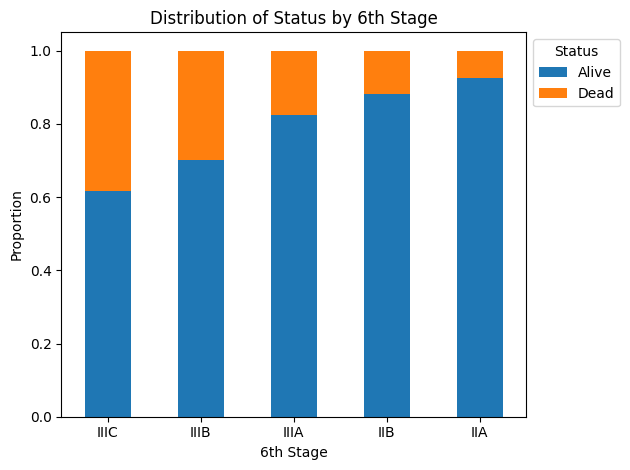

In [49]:
stacked_barplot('6th Stage', 'Status')

* IIIC stage shows approximatley 40 percent of death rate.

* Mortality rate increases with higher 6th stages, suggesting strong correlation between 6th Stage and Status.

**Grade & Status**

Status     Alive  Dead   All
Grade                       
All         3407   616  4023
Grade II    2045   305  2350
Grade III    848   263  1111
Grade I      504    39   543
Grade IV      10     9    19 



<Figure size 800x500 with 0 Axes>

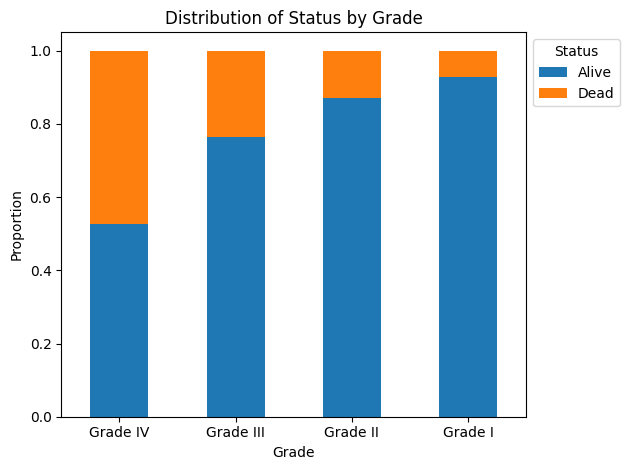

In [50]:
stacked_barplot('Grade', 'Status')

* Grade IV (Undifferentiated) shows approximatley 50 percent of death rate.

* Mortality rate increases with higher Grade level, suggesting strong correlation between Grade and Status.

**A Stage & Status**

Status    Alive  Dead   All
A Stage                    
All        3407   616  4023
Regional   3350   581  3931
Distant      57    35    92 



<Figure size 600x500 with 0 Axes>

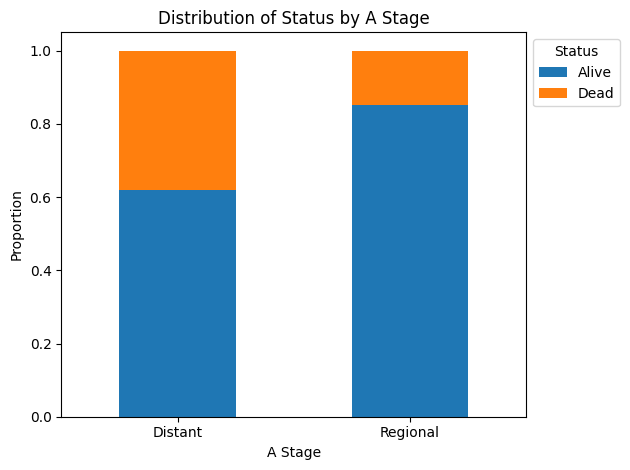

In [51]:
stacked_barplot('A Stage', 'Status')

* Patients with distant stage shows much higher death rate than regional stage.

**Estrogen Status & Status**

Status           Alive  Dead   All
Estrogen Status                   
All               3407   616  4023
Positive          3246   508  3754
Negative           161   108   269 



<Figure size 600x500 with 0 Axes>

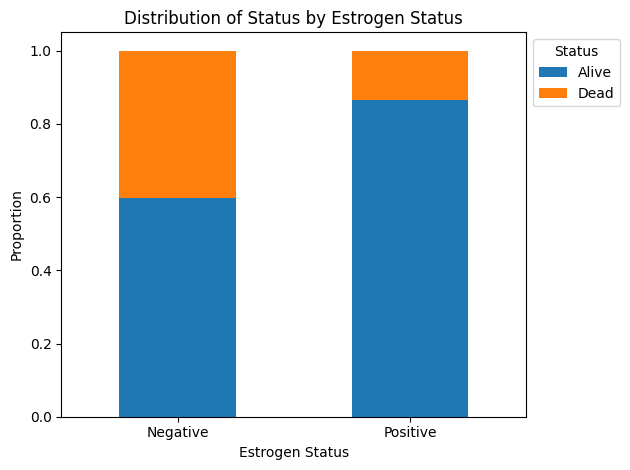

In [52]:
stacked_barplot('Estrogen Status', 'Status')

* Patients with ER-negative tumors have a much higher mortality rate.

**Progesterone Status & Stats**

Status               Alive  Dead   All
Progesterone Status                   
All                   3407   616  4023
Positive              2913   412  3325
Negative               494   204   698 



<Figure size 600x500 with 0 Axes>

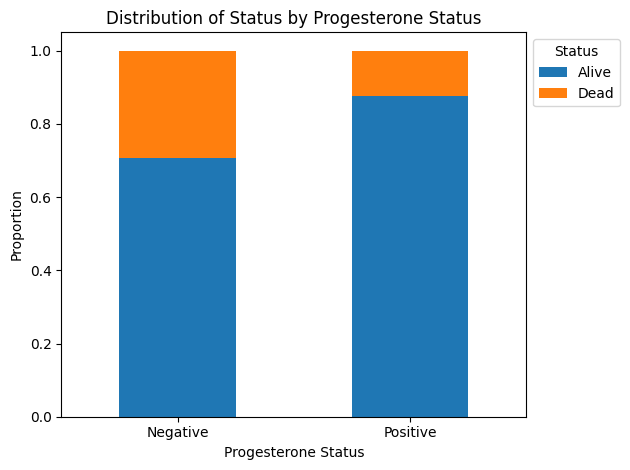

In [53]:
stacked_barplot('Progesterone Status', 'Status')

* PR-negative patients have a significantly higher death rate.

## Hypothesis Testing

* Hypothesis testing will help discover whether observed differences in features between alive vs dead groups are statistically significant.

In [54]:
# Convert Status to binary (1 for Alive, 0 for Dead)
df['Status'] = df['Status'].apply(lambda x: 1 if x == 'Dead' else 0).astype(np.int64)
df['Status'].value_counts(1)

,proportion
Status,
0,0.84688
1,0.15312


* The target variable is highly imbalanced with approximately 85:15 (Alive / Dead)

In [55]:
# Identify categorical and numerical columns
cat_cols = df.select_dtypes(include = 'category').columns.tolist()
num_cols = df.select_dtypes(include = np.number).columns.drop('Status').tolist()

### **Base Hypothesis for Statistical Testing**

To understand whether specific features differ significantly between patients who are alive and dead, we define the following hypotheses:

* **Null Hypothesis (H₀):** There is no significant difference in the selected features between two groups of patients (Alive / Dead).
* **Alternative Hypothesis (H₁):** There is a significant difference in the selected features between two groups of patients (Alive / Dead).

---

### **Choice of Tests**

Since we will using various machine learning and deep learning models that do not rely on traditional statistical assumptions (such as normality or homoscedasticity), our choice of tests will be non-parametric tests, which do not require strong distributional assumptions:

* **Mann–Whitney U Test**: Applied to numeric variables to assess whether the distribution of values differs between the two outcome groups (Alive vs. Dead).

* **Chi-square Test of Independence**: Applied to categorical variables to determine whether there is a significant association between the variable and patient status.

These tests may provide statistically robust insights beyond the visualizations.

### Mann-Whitney U Test

In [56]:
def mannwhitney_test(df, predictor, target, group1_val, group2_val):
    """
    Perform Mann–Whitney U test on a numeric column between two groups.

    Parameters:
    - df: DataFrame containing the data
    - predictor: the name of the numeric column to compare
    - target: the column defining the two groups of patient status
    - group1_val: value representing the first group in target (alive)
    - group2_val: value representing the second group in target (dead)

    Output:
    - U statistics and p-values for numeric features
    """
    group1 = df[df[target] == group1_val][predictor]
    group2 = df[df[target] == group2_val][predictor]

    u_stat, p_val = mannwhitneyu(group1, group2, alternative = 'two-sided')
    print(f"Mann–Whitney U Test for {predictor}: U = {u_stat:.2f}, p-value = {p_val:.5f}")

In [59]:
for col in num_cols:
    mannwhitney_test(df, predictor = col, target = 'Status', group1_val = 1, group2_val = 0)
    print('-' * 70)

Mann–Whitney U Test for Age: U = 1154659.00, p-value = 0.00007
----------------------------------------------------------------------
Mann–Whitney U Test for Tumor Size: U = 1285572.50, p-value = 0.00000
----------------------------------------------------------------------
Mann–Whitney U Test for Regional Node Examined: U = 1097707.00, p-value = 0.06814
----------------------------------------------------------------------
Mann–Whitney U Test for Regional Node Positive: U = 1406220.00, p-value = 0.00000
----------------------------------------------------------------------
Mann–Whitney U Test for Survival Months: U = 350417.00, p-value = 0.00000
----------------------------------------------------------------------


* According to the Mann-Whitney U Test, Regional Node Examined does not show a statistically significant difference (p > 0.05), and thus we fail to reject the null hypothesis for this variable.

* These results suggest that factors such as age, tumor burden, and node involvement are potentially important in influencing survival outcomes, whereas the number of regional nodes examined alone may not be a discriminative factor.

### Chi-Square Test

In [60]:
def chi_squared_test(df, predictor, target):
    """
    Performs the Chi-Squared Test of Independence between a categorical feature and the target.

    Parameters:
    - df: DataFrame containing the data
    - predictor: Name of the categorical feature column
    - target: Name of the binary target column (Status)

    Output:
    - Test statistic and p-values of categorical columns
    """
    contingency = pd.crosstab(df[predictor], df[target])
    chi2, p, dof, expected = chi2_contingency(contingency)
    print(f"Chi-Square Test for {predictor}: Chi² = {chi2:.2f}, p-value = {p:.5f}")

In [61]:
for col in cat_cols:
    chi_squared_test(df, predictor = col, target = 'Status')
    print('-' * 70)

Chi-Square Test for Race: Chi² = 27.96, p-value = 0.00000
----------------------------------------------------------------------
Chi-Square Test for Marital Status: Chi² = 28.22, p-value = 0.00001
----------------------------------------------------------------------
Chi-Square Test for T Stage: Chi² = 103.35, p-value = 0.00000
----------------------------------------------------------------------
Chi-Square Test for N Stage: Chi² = 269.77, p-value = 0.00000
----------------------------------------------------------------------
Chi-Square Test for 6th Stage: Chi² = 281.45, p-value = 0.00000
----------------------------------------------------------------------
Chi-Square Test for Grade: Chi² = 112.48, p-value = 0.00000
----------------------------------------------------------------------
Chi-Square Test for A Stage: Chi² = 35.75, p-value = 0.00000
----------------------------------------------------------------------
Chi-Square Test for Estrogen Status: Chi² = 135.09, p-value = 0.0000

* According to Chi-Square Test, it shows a statistically significant difference (p > 0.05) for all the categorical variables, therefore, rejecting the null hypothesis.

* These results suggest that categorical features are potentially important in influencing survival outcomes.

* It seems that there is no valid reason to drop features according to the statistical tests.

## Data Preprocessing

* Data Preprocessing is a crucial step in machine learning analysis as inappropraite preprocessing may lead to wrong or unreliable results.

* Categorical features will be encoded according to their nature (ordinal / nominal)

* Numeric features will not be scaled as the ML techniques used in this study do not require scaling.

In [62]:
# Create lists for numeric and categorical features
cat_cols = df.select_dtypes(include = 'category').columns.tolist()
num_cols = df.select_dtypes(include = np.number).columns.tolist()
num_cols.remove('Status')

In [63]:
# Separate ordinal and nominal categorical features
ordinal_cat = ['T Stage', 'N Stage', '6th Stage', 'Grade']
nominal_cat = [col for col in cat_cols if col not in ordinal_cat]

In [64]:
# Set custom order for ordinal categorical variables
custom_order = [
    ['T1', 'T2', 'T3', 'T4'],  # T Stage
    ['N1', 'N2', 'N3'],        # N Stage
    ['IIA', 'IIB', 'IIIA', 'IIIB', 'IIIC'],  # 6th Stage
    ['Grade I', 'Grade II', 'Grade III','Grade IV']  # Grade
]

In [65]:
# Divide the target and predictor
X_raw = df.drop('Status', axis=1)
y = df['Status']

# Create train/validation/test splits
X_temp_raw, X_test_raw, y_temp, y_test = train_test_split(
    X_raw, y, test_size = 0.2, random_state = 1, stratify = y
)
X_train_raw, X_val_raw, y_train, y_val = train_test_split(
    X_temp_raw, y_temp, test_size = 0.25, random_state = 1, stratify = y_temp
)

# Print the splitted number of rows
print(f"Splits - Train: {X_train_raw.shape[0]}, Validation: {X_val_raw.shape[0]}, Test: {X_test_raw.shape[0]}")

Splits - Train: 2413, Validation: 805, Test: 805


In [66]:
# Initialize encoders
ordinal_encoder = OrdinalEncoder(categories = custom_order)
onehot_encoder = OneHotEncoder(sparse_output = False, drop = None)

# Fit encoders on training data only
ordinal_encoder.fit(X_train_raw[ordinal_cat])
onehot_encoder.fit(X_train_raw[nominal_cat])

OneHotEncoder(sparse_output=False)

In [67]:
# Transform the ordinal categorical variables on the training data
X_train_ord = pd.DataFrame(
    ordinal_encoder.transform(X_train_raw[ordinal_cat]).astype(int),
    columns = ordinal_cat,
    index = X_train_raw.index
)

# Transform the nominal categorical variables on the training data
X_train_nom = pd.DataFrame(
    onehot_encoder.transform(X_train_raw[nominal_cat]).astype(int),
    columns = onehot_encoder.get_feature_names_out(nominal_cat),
    index=X_train_raw.index
)

In [68]:
# Transform the ordinal categorical variables on the validation data
X_val_ord = pd.DataFrame(
    ordinal_encoder.transform(X_val_raw[ordinal_cat]).astype(int),
    columns = ordinal_cat,
    index = X_val_raw.index
)

# Transform the nominal categorical variables on the validation data
X_val_nom = pd.DataFrame(
    onehot_encoder.transform(X_val_raw[nominal_cat]).astype(int),
    columns = onehot_encoder.get_feature_names_out(nominal_cat),
    index = X_val_raw.index
)

In [69]:
# Transform the ordinal categorical variables on the test data
X_test_ord = pd.DataFrame(
    ordinal_encoder.transform(X_test_raw[ordinal_cat]).astype(int),
    columns = ordinal_cat,
    index = X_test_raw.index
)

# Transform the nominal categorical variables on the test data
X_test_nom = pd.DataFrame(
    onehot_encoder.transform(X_test_raw[nominal_cat]).astype(int),
    columns = onehot_encoder.get_feature_names_out(nominal_cat),
    index = X_test_raw.index
)

In [70]:
# Combine encoded features with numerical features
X_train = pd.concat([X_train_ord, X_train_nom, X_train_raw[num_cols]], axis = 1)
X_val = pd.concat([X_val_ord, X_val_nom, X_val_raw[num_cols]], axis = 1)
X_test = pd.concat([X_test_ord, X_test_nom, X_test_raw[num_cols]], axis = 1)

# Print the splitted number of rows
print(f"Processed splits - Train: {X_train.shape[0]}, Validation: {X_val.shape[0]}, Test: {X_test.shape[0]}")

Processed splits - Train: 2413, Validation: 805, Test: 805


In [71]:
# List the features with categorical nature
cat_indices = list(range(18))
print(f"Categorical indices: {cat_indices}")

Categorical indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17]


## Quick Evaluation - Which Resampling Method & Model?

* In this section, we will utilize a function that deploys various resampling techniques on multiple machine learning models to see which method works best on which model.

* This approach will narrow down the process of going through different

In [72]:
# Function to check which resampling method & model shows best performances
def evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices, base_clf, random_state = 42, n_splits=5):
    """
    Evaluation function for cross validation and evalution on metrices

    Parameters:
    - X_train, y_train: Training data for cross-validation
    - X_val, y_val: Validation data for final evaluation
    - cat_indices: List of categorical feature indices
    - base_clf: Base classifier for evaluation
    - random_state: Random state for reproducibility
    - n_splits: Number of folds for cross-validation

    Output:
    - DataFrame with results including both CV and validation scores
    """

    resampling_techniques = {
        'Baseline (No Resampling)': None,
        'SMOTE-NC': SMOTENC(categorical_features = cat_indices, random_state = random_state),
        'Random Oversampling': RandomOverSampler(random_state = random_state),
        'Random Undersampling': RandomUnderSampler(random_state = random_state),
        'Tomek Links': TomekLinks(),
        'Edited Nearest Neighbours': EditedNearestNeighbours(),
        'SMOTE-ENN': SMOTEENN(
            smote = SMOTENC(categorical_features = cat_indices, random_state = random_state),
            random_state=random_state
        ),
        'SMOTE-Tomek': SMOTETomek(
            smote=SMOTENC(categorical_features = cat_indices, random_state = random_state),
            random_state=random_state
        )
    }

    # An empty list to store the results
    results = []

    for name, resampler in resampling_techniques.items():
        try:
            # Cross-validation on training data
            if resampler is None:
                # No resampling: sklearn pipeline (for baseline model)
                model_cv = clone(base_clf)
                cv_scores = cross_validate(
                    model_cv, X_train, y_train,
                    cv = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state),
                    scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc'],
                    return_train_score = False
                )
            else:
                # Resampling: imblearn pipeline
                pipeline_cv = Pipeline([
                    ('resampler', resampler),
                    ('classifier', clone(base_clf))
                ])
                cv_scores = cross_validate(
                    pipeline_cv, X_train, y_train,
                    cv = StratifiedKFold(n_splits = n_splits, shuffle = True, random_state = random_state),
                    scoring = ['f1', 'precision', 'recall', 'accuracy', 'roc_auc'],
                    return_train_score = False
                )

            # Fit on full training data and evaluate on validation set

            # Base model (No resampling)
            if resampler is None:
                final_model = clone(base_clf)
                final_model.fit(X_train, y_train)
                y_val_pred = final_model.predict(X_val)
                y_val_proba = final_model.predict_proba(X_val)[:, 1]

            # Resampling
            else:
                final_pipeline = Pipeline([
                    ('resampler', resampler),
                    ('classifier', clone(base_clf))
                ])
                final_pipeline.fit(X_train, y_train)
                y_val_pred = final_pipeline.predict(X_val)
                y_val_proba = final_pipeline.predict_proba(X_val)[:, 1]

            # Calculate validation metrics
            val_accuracy = accuracy_score(y_val, y_val_pred)
            val_precision = precision_score(y_val, y_val_pred, pos_label = 1)
            val_recall = recall_score(y_val, y_val_pred, pos_label = 1)
            val_f1 = f1_score(y_val, y_val_pred, pos_label = 1)
            val_roc_auc = roc_auc_score(y_val, y_val_proba)

            results.append({
                'Technique': name,
                'CV_Acc': round(np.mean(cv_scores['test_accuracy']), 4),
                'CV_Precision': round(np.mean(cv_scores['test_precision']), 4),
                'CV_Recall': round(np.mean(cv_scores['test_recall']), 4),
                'CV_F1': round(np.mean(cv_scores['test_f1']), 4),
                'CV_ROC_AUC': round(np.mean(cv_scores['test_roc_auc']), 4),
                'Val_Acc': round(val_accuracy, 4),
                'Val_Precision': round(val_precision, 4),
                'Val_Recall': round(val_recall, 4),
                'Val_F1': round(val_f1, 4),
                'Val_ROC_AUC': round(val_roc_auc, 4)
            })

        except Exception as e:

            # If anything fails, skip that one and continue
            print(f"Error occurred during '{name}': {e}")
            continue

    # Final results DataFrame
    results_df = pd.DataFrame(results)

    # Sort by validation F1 score
    if not results_df.empty and 'Val_F1' in results_df.columns:
        results_df = results_df.sort_values('Val_F1', ascending = False).reset_index(drop=True)

    return results_df

In [73]:
# Test with Decision Tree
dt_results = evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices,
                                    DecisionTreeClassifier(random_state = 42))

# Test with Random Forest
rf_results = evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices,
                                    RandomForestClassifier(random_state = 42))

# Test with XGBoost
xgb_results = evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices,
                                     XGBClassifier(random_state = 42))

# Test with CatBoost
cat_results = evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices,
                                     CatBoostClassifier(verbose = 0, random_state = 42))

# Test with HistGradientBoosting
hgb_results = evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices,
                                     HistGradientBoostingClassifier(random_state = 42))

# Test with Bagging
bagging_results = evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices,
                                         BaggingClassifier(random_state = 42))

# Test with AdaBoost
adaboost_results = evaluate_resampling(X_train, y_train, X_val, y_val, cat_indices,
                                          AdaBoostClassifier(random_state = 42))

In [74]:
# Define a list of (name, result) tuples
model_results = [
    ("Decision Tree", dt_results),
    ("Random Forest", rf_results),
    ("XGBoost", xgb_results),
    ("CatBoost", cat_results),
    ("HistGradientBoosting", hgb_results),
    ("Bagging", bagging_results),
    ("AdaBoost", adaboost_results)
]

# Print the first two results
for name, result in model_results[:2]:
    print(f"\n{name} Results: \n")
    display(result)


Decision Tree Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8127,0.4234,0.6108,0.4997,0.7300,0.8298,0.4573,0.6098,0.5226,0.7396
1,Random Oversampling,0.8462,0.4984,0.4811,0.4892,0.6967,0.8522,0.5169,0.4959,0.5062,0.7062
2,SMOTE-ENN,0.7646,0.3625,0.6865,0.4740,0.7326,0.7888,0.3927,0.6992,0.5029,0.7521
3,Baseline (No Resampling),0.8363,0.4666,0.4676,0.4666,0.6853,0.8398,0.4779,0.5285,0.5019,0.7122
4,Tomek Links,0.8317,0.4552,0.4892,0.4714,0.6915,0.8497,0.5086,0.4797,0.4937,0.6980
5,SMOTE-NC,0.7725,0.3428,0.5297,0.4149,0.6731,0.8112,0.4088,0.5285,0.4610,0.6953
6,SMOTE-Tomek,0.7712,0.3383,0.5162,0.4079,0.6668,0.7839,0.3651,0.5610,0.4423,0.6925
7,Random Undersampling,0.6904,0.2874,0.6892,0.4054,0.6899,0.7106,0.3116,0.7398,0.4386,0.7226



Random Forest Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8790,0.6145,0.5703,0.5913,0.8427,0.9118,0.7653,0.6098,0.6787,0.8715
1,Tomek Links,0.8964,0.7431,0.4946,0.5931,0.8445,0.9106,0.8312,0.5203,0.6400,0.8697
2,Baseline (No Resampling),0.9018,0.8302,0.4514,0.5830,0.8439,0.9093,0.8571,0.4878,0.6218,0.8638
3,Random Oversampling,0.8931,0.7202,0.4919,0.5840,0.8465,0.8944,0.7209,0.5041,0.5933,0.8526
4,SMOTE-NC,0.8591,0.5384,0.5622,0.5493,0.8283,0.8609,0.5440,0.5528,0.5484,0.8264
5,Random Undersampling,0.7903,0.4018,0.7432,0.5214,0.8369,0.8112,0.4319,0.7480,0.5476,0.8577
6,SMOTE-Tomek,0.8578,0.5349,0.5622,0.5473,0.8283,0.8584,0.5349,0.5610,0.5476,0.8292
7,SMOTE-ENN,0.8123,0.4329,0.7027,0.5351,0.8298,0.8224,0.4444,0.6504,0.5281,0.8422


In [75]:
# Print the next two results
for name, result in model_results[2:4]:
    print(f"\n{name} Results: \n")
    display(result)


XGBoost Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Random Oversampling,0.8794,0.6254,0.5297,0.5728,0.8172,0.8944,0.6900,0.5610,0.6188,0.8360
1,Edited Nearest Neighbours,0.8595,0.5373,0.6270,0.5777,0.8284,0.8820,0.6129,0.6179,0.6154,0.8508
2,Baseline (No Resampling),0.8898,0.7178,0.4703,0.5649,0.8251,0.8994,0.7442,0.5203,0.6124,0.8376
3,Tomek Links,0.8864,0.6688,0.5135,0.5804,0.8271,0.8932,0.7176,0.4959,0.5865,0.8398
4,SMOTE-Tomek,0.8467,0.5017,0.5568,0.5275,0.8089,0.8472,0.5000,0.5447,0.5214,0.7997
5,SMOTE-ENN,0.7998,0.4105,0.6811,0.5118,0.8281,0.8149,0.4309,0.6585,0.5209,0.8489
6,Random Undersampling,0.7642,0.3635,0.7081,0.4801,0.8185,0.7925,0.3972,0.6911,0.5045,0.8418
7,SMOTE-NC,0.8467,0.4998,0.5595,0.5276,0.8074,0.8360,0.4676,0.5285,0.4962,0.8028



CatBoost Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8765,0.6030,0.5838,0.5925,0.8471,0.8994,0.6944,0.6098,0.6494,0.8694
1,Tomek Links,0.8993,0.7596,0.5027,0.6046,0.8481,0.9081,0.8025,0.5285,0.6373,0.8619
2,Baseline (No Resampling),0.9022,0.8029,0.4811,0.6005,0.8458,0.9081,0.8451,0.4878,0.6186,0.8662
3,Random Oversampling,0.8773,0.6079,0.5595,0.5819,0.8310,0.8820,0.6273,0.5610,0.5923,0.8573
4,Random Undersampling,0.7895,0.3993,0.7270,0.5149,0.8405,0.8323,0.4684,0.7236,0.5687,0.8670
5,SMOTE-ENN,0.8015,0.4143,0.7027,0.5210,0.8345,0.8224,0.4474,0.6911,0.5431,0.8498
6,SMOTE-Tomek,0.8533,0.5198,0.5946,0.5544,0.8194,0.8522,0.5152,0.5528,0.5333,0.8184
7,SMOTE-NC,0.8483,0.5062,0.5946,0.5465,0.8153,0.8509,0.5113,0.5528,0.5312,0.8177


In [78]:
# Print the next two results
for name, result in model_results[4:6]:
    print(f"\n{name} Results: \n")
    display(result)


HistGradientBoosting Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Tomek Links,0.8885,0.6873,0.5000,0.5773,0.8380,0.8969,0.7222,0.5285,0.6103,0.8523
1,Edited Nearest Neighbours,0.8674,0.5625,0.6108,0.5854,0.8380,0.8807,0.6098,0.6098,0.6098,0.8599
2,Baseline (No Resampling),0.8960,0.7524,0.4784,0.5825,0.8408,0.9019,0.7895,0.4878,0.6030,0.8519
3,Random Oversampling,0.8811,0.6302,0.5486,0.5836,0.8255,0.8820,0.6346,0.5366,0.5815,0.8347
4,SMOTE-Tomek,0.8433,0.4913,0.5784,0.5312,0.8189,0.8547,0.5217,0.5854,0.5517,0.8188
5,SMOTE-ENN,0.7994,0.4103,0.6730,0.5090,0.8297,0.8273,0.4570,0.6911,0.5502,0.8492
6,SMOTE-NC,0.8479,0.5039,0.5784,0.5385,0.8203,0.8472,0.5000,0.5528,0.5251,0.8144
7,Random Undersampling,0.7679,0.3706,0.7270,0.4907,0.8337,0.8025,0.4126,0.6911,0.5167,0.8491



Bagging Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8645,0.5564,0.5865,0.5706,0.8117,0.8994,0.6944,0.6098,0.6494,0.8486
1,Tomek Links,0.8893,0.6980,0.4892,0.5739,0.7984,0.9106,0.8148,0.5366,0.6471,0.8304
2,Baseline (No Resampling),0.8914,0.7264,0.4676,0.5683,0.7903,0.9006,0.7867,0.4797,0.5960,0.8299
3,Random Oversampling,0.8757,0.6150,0.5081,0.5555,0.8026,0.8932,0.7079,0.5122,0.5943,0.8283
4,Random Undersampling,0.7762,0.3750,0.6892,0.4857,0.8109,0.8224,0.4500,0.7317,0.5573,0.8412
5,SMOTE-ENN,0.7936,0.3941,0.6405,0.4878,0.8138,0.8360,0.4740,0.6667,0.5541,0.8375
6,SMOTE-Tomek,0.8454,0.4956,0.5270,0.5104,0.7950,0.8596,0.5403,0.5447,0.5425,0.8176
7,SMOTE-NC,0.8454,0.4953,0.5216,0.5067,0.8028,0.8559,0.5294,0.5122,0.5207,0.8195


In [81]:
# Print the last result
for name, result in model_results[6:7]:
    print(f"\n{name} Results: \n")
    display(result)


AdaBoost Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8815,0.6182,0.6000,0.6084,0.8581,0.9031,0.7184,0.6016,0.6549,0.8692
1,Baseline (No Resampling),0.8943,0.7289,0.5027,0.5929,0.8581,0.9056,0.7901,0.5203,0.6275,0.8521
2,SMOTE-Tomek,0.8069,0.4238,0.7135,0.5314,0.8510,0.8658,0.5466,0.7154,0.6197,0.8498
3,Tomek Links,0.8902,0.6877,0.5324,0.5988,0.8604,0.8981,0.7253,0.5366,0.6168,0.8523
4,SMOTE-NC,0.8131,0.4337,0.7108,0.5384,0.8499,0.8596,0.5301,0.7154,0.6090,0.8482
5,Random Oversampling,0.8139,0.4393,0.7270,0.5467,0.8633,0.8534,0.5141,0.7398,0.6067,0.8832
6,Random Undersampling,0.7758,0.3830,0.7541,0.5077,0.8554,0.8484,0.5027,0.7480,0.6013,0.8709
7,SMOTE-ENN,0.7596,0.3661,0.7649,0.4947,0.8494,0.7938,0.4061,0.7561,0.5284,0.8466


* Generally, the models do not show great performances on typical binary classification metrices such as recall and precision.

* However, they show great performances over 85+ percent from various models & resampling technique.

* Therefore, risk score analysis would be a better choice for this dataset than binary classification.

* The top 3 models are:
  * AdaBoost + Edited Nearest Neighbours achieving 65.49% F1 score and 86.92% ROC-AUC
  * Random Forest + Edited Nearest Neighbours with 67.87% F1 score and 87.15% ROC-AUC
  * CatBoost + Edited Nearest Neighbours reaching 64.94% F1 score and 86.94% ROC-AUC.

* We can try to improve the model performances with appropriate feature engineering.

* Let's check the class distribution of Status before feature engineering.

## Data Cluster Analysis

* We will create a new, preprocessed dataframe for t-SNE and UMAP visualization.

In [83]:
# Create a copy of the original dataset
df_raw = df.copy()

# Convert Status to binary (1 for Alive, 0 for Dead)
df_raw['Status'] = df_raw['Status'].apply(lambda x: 1 if x == 'Dead' else 0)

# Define preprocessing tools
ord_encoder = OrdinalEncoder(categories = custom_order)
nom_encoder = OneHotEncoder(handle_unknown = 'ignore', sparse_output = False)
scaler = StandardScaler()

# ColumnTransformer for all preprocessing steps
col_trans = ColumnTransformer(transformers = [
    ('ord', ord_encoder, ordinal_cat),
    ('nom', nom_encoder, nominal_cat),
    ('num', scaler, num_cols)
])

# Apply transformation
preprocessed = col_trans.fit_transform(df_raw)

# Get one hot encoded feature names
nominal_encoded_cols = col_trans.named_transformers_['nom'].get_feature_names_out(nominal_cat)
# Make a grand list of processed feature names
processed_cols = ordinal_cat + list(nominal_encoded_cols) + num_cols

# Create a preprocessed DataFrame
df_processed = pd.DataFrame(preprocessed, columns = processed_cols)

### t-SNE

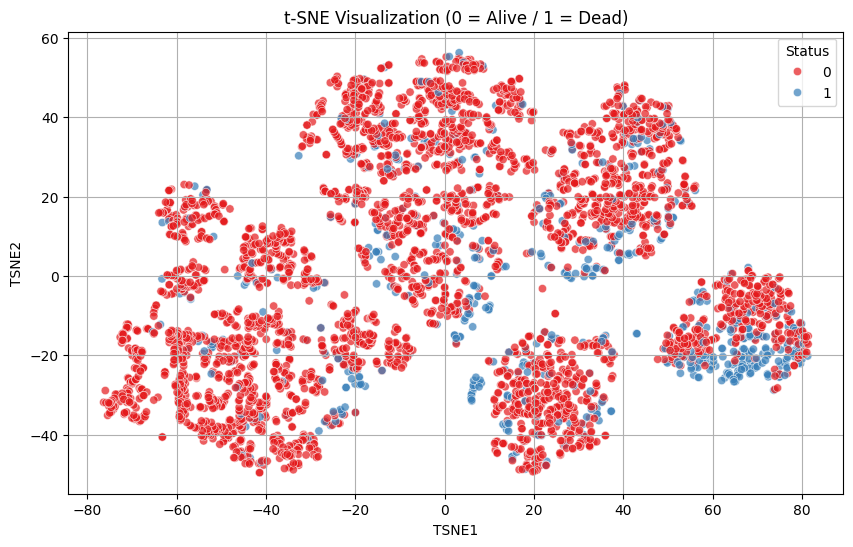

In [84]:
# Run t-SNE
tsne = TSNE(n_components = 2, random_state = 42, perplexity = 30, n_iter = 1000)
X_tsne = tsne.fit_transform(df_processed)

# Create DataFrame for plotting
tsne_df = pd.DataFrame(X_tsne, columns = ['TSNE1', 'TSNE2'])
tsne_df['Status'] = y.values

# Plot t-SNE
plt.figure(figsize = (10, 6))
sns.scatterplot(data = tsne_df, x = 'TSNE1', y = 'TSNE2', hue = 'Status', palette = 'Set1', alpha = 0.7)
plt.title('t-SNE Visualization (0 = Alive / 1 = Dead)')
plt.legend(title = 'Status')
plt.grid(True)
plt.show()

* The plot shows well-separated clusters.

* Blue dots (Dead) are seemed to be more focused in certain clusters, particularly the ones in the lower-right.

* However, there are overlaps that can conceal the pattern of classes, which could obscure clear class boundaries and limit model performance.

* Let's check with UMAP as well for further analysis.

### UMAP

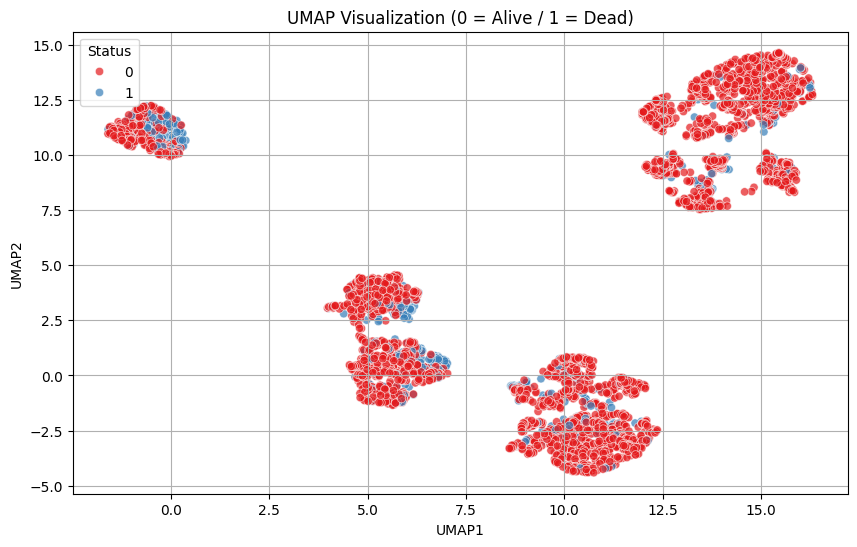

In [85]:
# Run UMAP
umap_model = umap.UMAP(n_components = 2, random_state = 42, n_neighbors = 15, min_dist = 0.1)
X_umap = umap_model.fit_transform(df_processed)

# Create DataFrame for plotting
umap_df = pd.DataFrame(X_umap, columns=['UMAP1', 'UMAP2'])
umap_df['Status'] = y.values

# Plot UMAP
plt.figure(figsize=(10, 6))
sns.scatterplot(data = umap_df, x = 'UMAP1', y = 'UMAP2', hue = 'Status', palette = 'Set1', alpha = 0.7)
plt.title('UMAP Visualization (0 = Alive / 1 = Dead)' )
plt.legend(title = 'Status')
plt.grid(True)
plt.show()

* The UMAP shows clear, well-separated clusters than t-SNE.

* Blue dots (Dead) are concentrated in specific clusters, especially in the left and bottom region, suggesting higher-risk groups.

* Better class separation than t-SNE, but overlap remains, meaning features don’t fully separate classes.

* Now, we have seen the class distribution and probable cause of low recall/precision, let's try feature engineering for performance improvement.

## Feature Engineering

* As I do not have sufficient domain knowledge of breast cancer, the feature engineering steps will be done intuitively.

In [88]:
# Function to create new data with engineered features
def create_high_impact_features(X):
    """
    Create 5 engineered features based on correlation analysis

    Parameters:
    - X: Preprocessed data without engineered features

    Output:
    - Preprocessed data with feature engineering
    """

    X_new = X.copy()

    # Ratio of positive nodes to examined nodes
    X_new['Node_Positive_Ratio'] = X['Regional Node Positive'] / (X['Regional Node Examined'])

    # Combines tumor size with grade for tumor severity
    X_new['Tumor_Severity'] = X['Tumor Size'] * (X['Grade'] + 1)

    # The graph used in binary visualization shows death rates increase after age 55
    X_new['High_Risk_Age'] = ((X['Age'] > 55)).astype(int)

    # The graph used in binary visualization shows death rates increase after node positive of 5
    X_new['High_Node'] = (X['Regional Node Positive'] >= 5).astype(int)

    # The graph used in binary visualization shows death rates increase after tumor size of 40
    X_new['Large_Tumor'] = (X['Tumor Size'] > 40).astype(int)

    return X_new

In [89]:
# Data with engineered features
X_train_eng = create_high_impact_features(X_train)
X_val_eng = create_high_impact_features(X_val)
X_test_eng = create_high_impact_features(X_test)

In [92]:
# List of categorical features
cat_indices_eng = list(range(18))

# Add engineered features with categorical nature
cat_indices_eng.extend([25, 26, 27])

print(f"Categorical indices: {cat_indices_eng}")

Categorical indices: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 25, 26, 27]


In [93]:
# Test with Decision Tree
dt_results2 = evaluate_resampling(X_train_eng, y_train, X_val_eng, y_val, cat_indices_eng,
                                    DecisionTreeClassifier(random_state = 42))

# Test with Random Forest
rf_results2 = evaluate_resampling(X_train_eng, y_train, X_val_eng, y_val, cat_indices_eng,
                                    RandomForestClassifier(random_state = 42))

# Test with XGBoost
xgb_results2 = evaluate_resampling(X_train_eng, y_train, X_val_eng, y_val, cat_indices_eng,
                                     XGBClassifier(random_state = 42))

# Test with CatBoost
cat_results2 = evaluate_resampling(X_train_eng, y_train, X_val_eng, y_val, cat_indices_eng,
                                     CatBoostClassifier(verbose = 0, random_state = 42))

# Test with HistGradientBoosting
hgb_results2 = evaluate_resampling(X_train_eng, y_train, X_val_eng, y_val, cat_indices_eng,
                                     HistGradientBoostingClassifier(random_state = 42))

# Test with Bagging (default base: DecisionTree)
bagging_results2 = evaluate_resampling(X_train_eng, y_train, X_val_eng, y_val, cat_indices_eng,
                                         BaggingClassifier(random_state = 42))

# Test with AdaBoost (default base: DecisionTree)
adaboost_results2 = evaluate_resampling(X_train_eng, y_train, X_val_eng, y_val, cat_indices_eng,
                                          AdaBoostClassifier(random_state = 42))

In [94]:
# Define a list of (name, result) tuples
model_results2 = [
    ("Decision Tree", dt_results2),
    ("Random Forest", rf_results2),
    ("XGBoost", xgb_results2),
    ("CatBoost", cat_results2),
    ("HistGradientBoosting", hgb_results2),
    ("Bagging", bagging_results2),
    ("AdaBoost", adaboost_results2)
]

# Print the first three results
for name, result in model_results2[:2]:
    print(f"\n{name} Results: \n")
    display(result)


Decision Tree Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8135,0.4270,0.6378,0.5112,0.7416,0.8273,0.4518,0.6098,0.5190,0.7382
1,SMOTE-ENN,0.7861,0.3899,0.6811,0.4954,0.7431,0.8012,0.4089,0.6748,0.5092,0.7494
2,Random Oversampling,0.8355,0.4664,0.4784,0.4717,0.6893,0.8571,0.5370,0.4715,0.5022,0.6991
3,Tomek Links,0.8359,0.4698,0.5270,0.4963,0.7094,0.8311,0.4539,0.5203,0.4848,0.7037
4,SMOTE-Tomek,0.8077,0.4057,0.5459,0.4645,0.7005,0.8186,0.4218,0.5041,0.4593,0.6897
5,Baseline (No Resampling),0.8396,0.4807,0.5081,0.4936,0.7039,0.8298,0.4453,0.4634,0.4542,0.6797
6,SMOTE-NC,0.7994,0.3870,0.5270,0.4455,0.6879,0.7988,0.3804,0.5041,0.4336,0.6780
7,Random Undersampling,0.7070,0.3044,0.6973,0.4229,0.7030,0.7130,0.2970,0.6423,0.4062,0.6840



Random Forest Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8811,0.6204,0.5811,0.5998,0.8443,0.8994,0.6909,0.6179,0.6524,0.8691
1,Tomek Links,0.8956,0.7540,0.4757,0.5821,0.8432,0.9068,0.8158,0.5041,0.6231,0.8617
2,Random Oversampling,0.8922,0.7228,0.4838,0.5775,0.8419,0.9019,0.7619,0.5203,0.6184,0.8611
3,Baseline (No Resampling),0.8964,0.7917,0.4405,0.5652,0.8401,0.9106,0.8923,0.4715,0.6170,0.8540
4,SMOTE-NC,0.8591,0.5393,0.5432,0.5400,0.8329,0.8783,0.6168,0.5366,0.5739,0.8296
5,Random Undersampling,0.7816,0.3913,0.7486,0.5135,0.8386,0.8286,0.4619,0.7398,0.5687,0.8599
6,SMOTE-Tomek,0.8628,0.5524,0.5568,0.5537,0.8379,0.8758,0.6095,0.5203,0.5614,0.8444
7,SMOTE-ENN,0.8197,0.4427,0.6703,0.5328,0.8404,0.8373,0.4767,0.6667,0.5559,0.8452


In [95]:
# Print the next two results
for name, result in model_results2[2:4]:
    print(f"\n{name} Results: \n")
    display(result)


XGBoost Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8599,0.5417,0.6081,0.5717,0.8408,0.8894,0.6349,0.6504,0.6426,0.8567
1,Random Oversampling,0.8794,0.6302,0.5189,0.5668,0.8300,0.8957,0.7010,0.5528,0.6182,0.8421
2,Tomek Links,0.8848,0.6655,0.4973,0.5682,0.8370,0.8969,0.7222,0.5285,0.6103,0.8389
3,Baseline (No Resampling),0.8848,0.6820,0.4703,0.5541,0.8381,0.9019,0.7973,0.4797,0.5990,0.8373
4,SMOTE-NC,0.8603,0.5455,0.5541,0.5484,0.8217,0.8671,0.5690,0.5366,0.5523,0.8293
5,SMOTE-Tomek,0.8607,0.5452,0.5784,0.5603,0.8207,0.8634,0.5537,0.5447,0.5492,0.8228
6,SMOTE-ENN,0.8135,0.4302,0.6622,0.5214,0.8366,0.8348,0.4702,0.6423,0.5430,0.8332
7,Random Undersampling,0.7596,0.3588,0.7162,0.4777,0.8311,0.8012,0.4098,0.6829,0.5122,0.8214



CatBoost Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8806,0.6187,0.5838,0.6004,0.8515,0.8994,0.6909,0.6179,0.6524,0.8732
1,Tomek Links,0.8947,0.7354,0.4892,0.5872,0.8487,0.9118,0.8333,0.5285,0.6468,0.8712
2,Baseline (No Resampling),0.8997,0.7942,0.4703,0.5889,0.8518,0.9093,0.8571,0.4878,0.6218,0.8704
3,Random Oversampling,0.8707,0.5832,0.5486,0.5644,0.8393,0.8795,0.6121,0.5772,0.5941,0.8550
4,Random Undersampling,0.7907,0.4013,0.7297,0.5172,0.8454,0.8422,0.4892,0.7398,0.5890,0.8692
5,SMOTE-ENN,0.8118,0.4281,0.6703,0.5222,0.8398,0.8435,0.4913,0.6911,0.5743,0.8433
6,SMOTE-Tomek,0.8549,0.5254,0.5568,0.5401,0.8257,0.8658,0.5630,0.5447,0.5537,0.8278
7,SMOTE-NC,0.8549,0.5297,0.5568,0.5419,0.8278,0.8634,0.5556,0.5285,0.5417,0.8223


In [96]:
# Print the next two results
for name, result in model_results2[4:6]:
    print(f"\n{name} Results: \n")
    display(result)


HistGradientBoosting Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Baseline (No Resampling),0.8910,0.7298,0.4595,0.5613,0.8440,0.9093,0.8205,0.5203,0.6368,0.8540
1,Edited Nearest Neighbours,0.8670,0.5656,0.6000,0.5813,0.8440,0.8907,0.6471,0.6260,0.6364,0.8564
2,Tomek Links,0.8947,0.7255,0.5054,0.5927,0.8427,0.9006,0.7416,0.5366,0.6226,0.8608
3,Random Oversampling,0.8699,0.5834,0.5297,0.5541,0.8352,0.8807,0.6262,0.5447,0.5826,0.8521
4,SMOTE-ENN,0.8172,0.4387,0.6703,0.5301,0.8396,0.8348,0.4709,0.6585,0.5492,0.8454
5,SMOTE-NC,0.8628,0.5521,0.5865,0.5679,0.8339,0.8596,0.5397,0.5528,0.5462,0.8252
6,SMOTE-Tomek,0.8537,0.5237,0.5622,0.5415,0.8323,0.8584,0.5354,0.5528,0.5440,0.8219
7,Random Undersampling,0.7638,0.3674,0.7324,0.4887,0.8351,0.7963,0.4047,0.7073,0.5148,0.8439



Bagging Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8699,0.5769,0.5784,0.5772,0.8226,0.8907,0.6522,0.6098,0.6303,0.8223
1,Baseline (No Resampling),0.8856,0.6958,0.4568,0.5504,0.8057,0.9043,0.8108,0.4878,0.6091,0.8267
2,Tomek Links,0.8864,0.6874,0.4757,0.5618,0.8148,0.8919,0.7093,0.4959,0.5837,0.8251
3,Random Oversampling,0.8773,0.6249,0.5081,0.5593,0.8088,0.8832,0.6629,0.4797,0.5566,0.8092
4,SMOTE-ENN,0.8172,0.4352,0.6405,0.5180,0.8304,0.8311,0.4633,0.6667,0.5467,0.8270
5,SMOTE-NC,0.8483,0.5126,0.5514,0.5292,0.8092,0.8559,0.5280,0.5366,0.5323,0.8186
6,SMOTE-Tomek,0.8537,0.5253,0.5405,0.5311,0.7989,0.8559,0.5304,0.4959,0.5126,0.8103
7,Random Undersampling,0.7787,0.3827,0.7162,0.4986,0.8180,0.7950,0.4000,0.6829,0.5045,0.7988


In [97]:
# Print the last result
for name, result in model_results2[6:7]:
    print(f"\n{name} Results: \n")
    display(result)


AdaBoost Results: 



,Technique,CV_Acc,CV_Precision,CV_Recall,CV_F1,CV_ROC_AUC,Val_Acc,Val_Precision,Val_Recall,Val_F1,Val_ROC_AUC
0,Edited Nearest Neighbours,0.8819,0.6212,0.6027,0.6110,0.8712,0.9031,0.7143,0.6098,0.6579,0.8812
1,Tomek Links,0.8873,0.6800,0.5297,0.5901,0.8714,0.9056,0.7527,0.5691,0.6481,0.8750
2,Baseline (No Resampling),0.8931,0.7256,0.5108,0.5954,0.8709,0.9081,0.8101,0.5203,0.6337,0.8815
3,Random Oversampling,0.8143,0.4392,0.7405,0.5509,0.8649,0.8472,0.5000,0.7398,0.5967,0.8712
4,Random Undersampling,0.7808,0.3902,0.7595,0.5152,0.8596,0.8348,0.4737,0.7317,0.5751,0.8609
5,SMOTE-NC,0.8085,0.4249,0.6919,0.5262,0.8505,0.8360,0.4746,0.6829,0.5600,0.8465
6,SMOTE-Tomek,0.8118,0.4318,0.7054,0.5353,0.8507,0.8149,0.4369,0.7317,0.5471,0.8470
7,SMOTE-ENN,0.7758,0.3856,0.7784,0.5156,0.8584,0.7739,0.3825,0.7805,0.5134,0.8549


**Overall Performance Changes:**

* Mixed results across algorithms - some improved, others slightly decreased
Improvements were modest (typically 1-3% changes) without major breakthroughs.

* Additional features with insights and powerful feature engineering with doamain knowledge would have better results.


**TOP 3 MODELS FOR RISK SCORE ANALYSIS:**

1. AdaBoost + ENN (Feature Engineering)

* Val F1: 65.79%

* Val ROC-AUC: 88.12% (HIGHEST)

---

2. CatBoost + ENN (Feature Engineering)

* Val F1: 65.24%

* Val ROC-AUC: 87.32%

---

3. Random Forest + ENN (Without Feature Engineering)

* Val F1: 67.87% (HIGHEST)

* Val ROC-AUC: 86.91%

---

* All three models used ENN as their resampler.

* We will be mainly focusing on these three models.

## Hyper-Parameter Tuning - RandomSearch

* We will check if hyper-parameter tuning may aid us in improving the model performance.

* The number of folds will be 5 and the number of iterations will be set to 50 for all models by default.

* Scorer will be ROC-AUC.

### AdaBoost Classifier

In [98]:
%%time

# Create a pipeline with decision tree as a base estimator
base_estimator = DecisionTreeClassifier(random_state = 42)
ada_pipeline = Pipeline([
    ('resampler', EditedNearestNeighbours()),
    ('classifier', AdaBoostClassifier(estimator = base_estimator, random_state = 42))
])

# Parameter grid
ada_param_grid = {
    'classifier__n_estimators': [50, 100, 200, 300, 500],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.5, 1.0, 2.0],
    'classifier__estimator__max_depth': [1, 2, 3, 4, 5],
    'classifier__estimator__min_samples_split': [2, 5, 10, 15],
    'classifier__estimator__min_samples_leaf': [1, 2, 5, 10]
}

# RandomizedSearchCV
ada_random_search = RandomizedSearchCV(
    estimator = ada_pipeline,
    param_distributions = ada_param_grid,
    n_iter = 50,
    n_jobs = -1,
    scoring = 'roc_auc',
    cv = 5,
    random_state = 42,
    verbose = 1
)

# Fit the model
ada_random_search.fit(X_train_eng, y_train)

# Print the results
print(f"Best parameters: {ada_random_search.best_params_}")
print(f"Best CV ROC-AUC: {ada_random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__n_estimators': 100, 'classifier__learning_rate': 1.0, 'classifier__estimator__min_samples_split': 15, 'classifier__estimator__min_samples_leaf': 1, 'classifier__estimator__max_depth': 1}
Best CV ROC-AUC: 0.8685
CPU times: user 4.98 s, sys: 782 ms, total: 5.76 s
Wall time: 6min 35s


### CatBoost Classifier

In [99]:
%%time

# Create a pipeline
cat_pipeline = Pipeline([
    ('resampler', EditedNearestNeighbours()),
    ('classifier', CatBoostClassifier(verbose = False, random_state = 42))
])

# Parameter grid
cat_param_grid = {
    'classifier__iterations': [100, 200, 500, 800, 1000],
    'classifier__depth': [3, 4, 5, 6, 8, 10],
    'classifier__learning_rate': [0.01, 0.05, 0.1, 0.2, 0.3],
    'classifier__l2_leaf_reg': [1, 3, 5, 7, 9],
    'classifier__border_count': [32, 64, 128, 255],
    'classifier__bagging_temperature': [0, 0.5, 1.0]
}

# RandomizedSearchCV
cat_random_search = RandomizedSearchCV(
    estimator = cat_pipeline,
    param_distributions = cat_param_grid,
    n_iter = 50,
    n_jobs = -1,
    scoring = 'roc_auc',
    cv = 5,
    random_state = 42,
    verbose = 1
)

# Fit the model
cat_random_search.fit(X_train_eng, y_train)

# Print the results
print(f"Best parameters: {cat_random_search.best_params_}")
print(f"Best CV ROC-AUC: {cat_random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__learning_rate': 0.01, 'classifier__l2_leaf_reg': 5, 'classifier__iterations': 800, 'classifier__depth': 3, 'classifier__border_count': 128, 'classifier__bagging_temperature': 0}
Best CV ROC-AUC: 0.8678
CPU times: user 8.32 s, sys: 1.67 s, total: 9.99 s
Wall time: 10min 1s


### RandomForest Classifier

In [100]:
%%time

# Create pipeline
rf_pipeline = Pipeline([
    ('resampler', EditedNearestNeighbours()),
    ('classifier', RandomForestClassifier(random_state = 42))
])

# Parameter grid
rf_param_grid = {
    'classifier__n_estimators': [100, 200, 300, 500, 800],
    'classifier__max_depth': [3, 5, 10, 15, 20, 25, 30],
    'classifier__min_samples_split': [2, 5, 10, 15, 20],
    'classifier__min_samples_leaf': [1, 2, 5, 10],
    'classifier__max_features': ['sqrt', 'log2', None],
    'classifier__bootstrap': [True, False]
}

# RandomizedSearchCV
rf_random_search = RandomizedSearchCV(
    estimator = rf_pipeline,
    param_distributions = rf_param_grid,
    n_iter = 50,
    n_jobs = -1,
    scoring = 'roc_auc',
    cv = 5,
    random_state = 42,
    verbose = 1
)

# Fit the model
rf_random_search.fit(X_train, y_train)

# Print the results
print(f"Best parameters: {rf_random_search.best_params_}")
print(f"Best CV ROC-AUC: {rf_random_search.best_score_:.4f}")

Fitting 5 folds for each of 50 candidates, totalling 250 fits
Best parameters: {'classifier__n_estimators': 800, 'classifier__min_samples_split': 5, 'classifier__min_samples_leaf': 2, 'classifier__max_features': 'log2', 'classifier__max_depth': 10, 'classifier__bootstrap': True}
Best CV ROC-AUC: 0.8508
CPU times: user 7.72 s, sys: 835 ms, total: 8.56 s
Wall time: 7min 9s


* Now we have the best parameters for all three models.

* Let's compare which model performs the best.

In [101]:
# Store results
results = []

# Evaluate AdaBoost
ada_best = ada_random_search.best_estimator_
ada_pred = ada_best.predict(X_val_eng)
ada_proba = ada_best.predict_proba(X_val_eng)[:, 1]

# Calculate and add the results
ada_results = {
    'Model': 'AdaBoost (ENN)',
    'Val_ROC_AUC': roc_auc_score(y_val, ada_proba),
    'Val_F1': f1_score(y_val, ada_pred),
    'Val_Accuracy': accuracy_score(y_val, ada_pred),
    'Val_Precision': precision_score(y_val, ada_pred),
    'Val_Recall': recall_score(y_val, ada_pred),
    'CV_ROC_AUC': ada_random_search.best_score_
}
results.append(ada_results)

In [102]:
# Evaluate CatBoost
cat_best = cat_random_search.best_estimator_
cat_pred = cat_best.predict(X_val_eng)
cat_proba = cat_best.predict_proba(X_val_eng)[:, 1]

# Calculate and add the results
cat_results = {
    'Model': 'CatBoost (ENN)',
    'Val_ROC_AUC': roc_auc_score(y_val, cat_proba),
    'Val_F1': f1_score(y_val, cat_pred),
    'Val_Accuracy': accuracy_score(y_val, cat_pred),
    'Val_Precision': precision_score(y_val, cat_pred),
    'Val_Recall': recall_score(y_val, cat_pred),
    'CV_ROC_AUC': cat_random_search.best_score_
}
results.append(cat_results)

In [103]:
# Evaluate Random Forest
rf_best = rf_random_search.best_estimator_
rf_pred = rf_best.predict(X_val)
rf_proba = rf_best.predict_proba(X_val)[:, 1]

# Calculate and add the results
rf_results = {
    'Model': 'Random Forest (ENN)',
    'Val_ROC_AUC': roc_auc_score(y_val, rf_proba),
    'Val_F1': f1_score(y_val, rf_pred),
    'Val_Accuracy': accuracy_score(y_val, rf_pred),
    'Val_Precision': precision_score(y_val, rf_pred),
    'Val_Recall': recall_score(y_val, rf_pred),
    'CV_ROC_AUC': rf_random_search.best_score_
}
results.append(rf_results)

In [104]:
# Sort by validation ROC-AUC
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Val_ROC_AUC', ascending = False).reset_index(drop = True)

results_df

,Model,Val_ROC_AUC,Val_F1,Val_Accuracy,Val_Precision,Val_Recall,CV_ROC_AUC
0,AdaBoost (ENN),0.883592,0.666667,0.903106,0.702703,0.634146,0.868491
1,CatBoost (ENN),0.881041,0.654545,0.905590,0.742268,0.585366,0.867766
2,Random Forest (ENN),0.871933,0.685185,0.915528,0.795699,0.601626,0.850848


* The hyper-parameter tuning did help on very slight improvement for model performance overall.

* Let's proceed to risk score analysis utilizing these models.

## Risk Score Analysis

In [105]:
# Function to calculate risk score of death (1 ~ 100)
def calculate_risk_score(model, X_data):
    """
    Calculate death risk score from 0-100

    Parameters:
    - model: Trained model on best estimators
    - X_data: Patient data

    Outcome:
    - Risk score
    """
    # Get probability of death for class 1
    death_prob = model.predict_proba(X_data)[:, 1]

    # Convert to risk score (0 ~ 100)
    risk_score = death_prob * 100

    return risk_score

In [106]:
# Function to evaluate risk score
def evaluate_risk_score(model, X_test, y_test):
   """
   Evaluate risk scoring performance

   Parameters:
   - model: Trained model on best parameters
   - X_test: Test dataset
   - y_test: True labels

   Outcome:
   - Risk scoring performance metrics
   """

   # Calculate risk scores
   risk_scores = calculate_risk_score(model, X_test)
   death_prob = risk_scores / 100

   # Performance metrics
   roc_auc = roc_auc_score(y_test, death_prob)

   # Risk scores for alive vs dead patients
   alive_risk_scores = risk_scores[y_test == 0]
   dead_risk_scores = risk_scores[y_test == 1]

   print(f'Mean risk score for alive patients: {round(alive_risk_scores.mean(), 4)}')
   print(f'Mean risk score for dead patients: {round(dead_risk_scores.mean(), 4)}')
   print(f'The ROC-AUC score for the test data is {round(roc_auc, 4)}')

   return round(roc_auc, 4)

In [107]:
# Check the average risk scores and get ROC-AUC score for best AdaBoost model
ada_roc_auc = evaluate_risk_score(ada_best, X_test_eng, y_test)

Mean risk score for alive patients: 37.532
Mean risk score for dead patients: 56.9884
The ROC-AUC score for the test data is 0.8703


In [108]:
# Check the average risk scores and get ROC-AUC score for best CatBoost model
cat_roc_auc = evaluate_risk_score(cat_best, X_test_eng, y_test)

Mean risk score for alive patients: 12.6742
Mean risk score for dead patients: 62.9101
The ROC-AUC score for the test data is 0.8741


In [109]:
# Check the average risk scores and get ROC-AUC score for best RandomForest model
rf_roc_auc = evaluate_risk_score(rf_best, X_test, y_test)

Mean risk score for alive patients: 13.8933
Mean risk score for dead patients: 56.1833
The ROC-AUC score for the test data is 0.8688


* CatBoost classifier seems to be the best model for risk score analysis as it shows the lowest mean risk score for alive patients and the highest risk score for dead patients.

* It also shows the highest ROC-AUC score.

* Let's see the risk score distribution for all models.

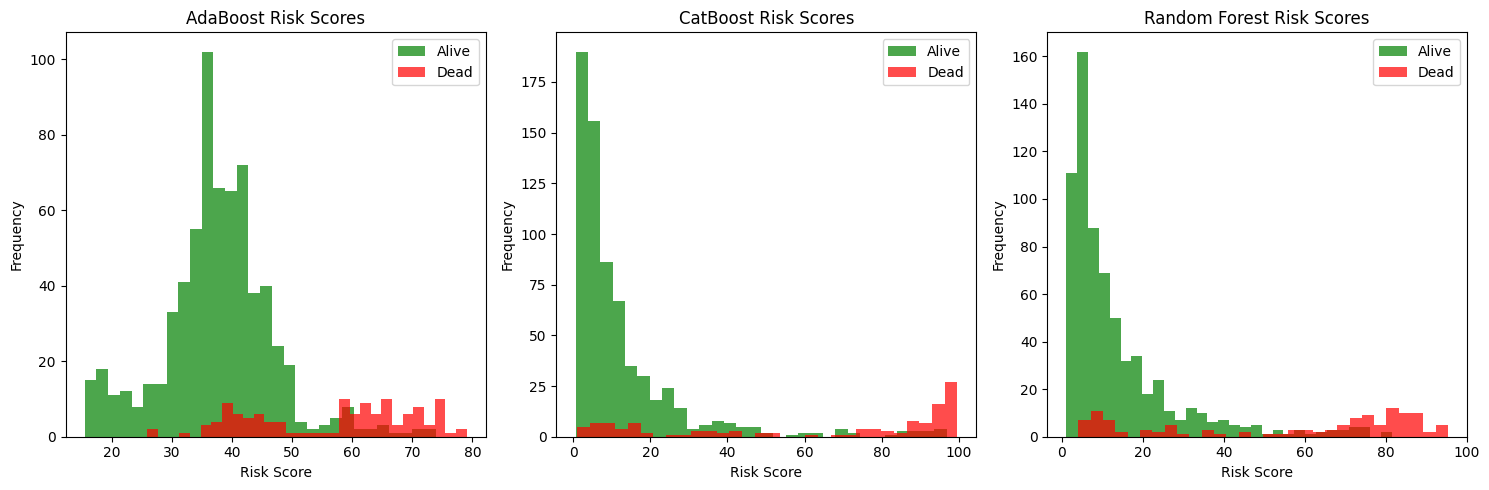

In [110]:
# Calculate risk scores for all three models
ada_risk_scores = calculate_risk_score(ada_best, X_test_eng)
cat_risk_scores = calculate_risk_score(cat_best, X_test_eng)
rf_risk_scores = calculate_risk_score(rf_best, X_test)

# Create subplots
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

# Plot AdaBoost risk scores by class
ada_alive = ada_risk_scores[y_test == 0]
ada_dead = ada_risk_scores[y_test == 1]
axes[0].hist(ada_alive, bins = 30, alpha = 0.7, color = 'green', label = 'Alive')
axes[0].hist(ada_dead, bins = 30, alpha = 0.7, color = 'red', label = 'Dead')
axes[0].set_title('AdaBoost Risk Scores')
axes[0].set_xlabel('Risk Score')
axes[0].set_ylabel('Frequency')
axes[0].legend()

# Plot CatBoost risk scores by class
cat_alive = cat_risk_scores[y_test == 0]
cat_dead = cat_risk_scores[y_test == 1]
axes[1].hist(cat_alive, bins = 30, alpha = 0.7, color = 'green', label = 'Alive')
axes[1].hist(cat_dead, bins = 30, alpha = 0.7, color = 'red', label = 'Dead')
axes[1].set_title('CatBoost Risk Scores')
axes[1].set_xlabel('Risk Score')
axes[1].set_ylabel('Frequency')
axes[1].legend()

# Plot Random Forest risk scores by class
rf_alive = rf_risk_scores[y_test == 0]
rf_dead = rf_risk_scores[y_test == 1]
axes[2].hist(rf_alive, bins = 30, alpha = 0.7, color = 'green', label = 'Alive')
axes[2].hist(rf_dead, bins = 30, alpha = 0.7, color = 'red', label = 'Dead')
axes[2].set_title('Random Forest Risk Scores')
axes[2].set_xlabel('Risk Score')
axes[2].set_ylabel('Frequency')
axes[2].legend()

# Print out the distribution plots
plt.tight_layout()
plt.show()

* The CatBoost histogram shows clearer separation between alive and dead patients.

* Most alive patients have very low risk scores while dead patients having higher risk scores, aligning the mean risk scores for alive and dead patients.

* Let's further analyze the CatBoost model, see it predicts the risk scores correctly for random sample of patients.

In [112]:
# Get random 50 samples
np.random.seed(42)
random_indices = np.random.choice(len(X_test_eng), size=50, replace=False)
cat_sample_scores = calculate_risk_score(cat_best, X_test_eng.iloc[random_indices])

# Create DataFrame for random 50 patients
sample_df = pd.DataFrame({
  'Patient_ID': range(1, 51),
  'Cat_Risk_Score': cat_sample_scores,
  'Actual_Status': ['Dead' if status == 1 else 'Alive' for status in y_test.iloc[random_indices]]
})

# Add prediction based on risk score threshold (63 = mean death risk score)
sample_df['Prediction'] = ['Dead' if risk >= 63 else 'Alive' for risk in sample_df['Cat_Risk_Score']]

# Add comparison between actual and prediction
sample_df['Correct_Prediction'] = sample_df['Actual_Status'] == sample_df['Prediction']

# Display possibly wrong predictions
sample_df[sample_df['Correct_Prediction'] == False]

,Patient_ID,Cat_Risk_Score,Actual_Status,Prediction,Correct_Prediction
0,1,74.384437,Alive,Dead,False
3,4,16.071244,Dead,Alive,False
17,18,19.698783,Dead,Alive,False
34,35,17.115354,Dead,Alive,False
38,39,72.977826,Alive,Dead,False
44,45,92.378893,Alive,Dead,False


Out of 50 random patients, the model may have predicted wrong for 6 patients, which aligns with our model's ROC-AUC performance of near 90 percent.

**Possible False Positives (Predicted high risk, Actually Alive):**
- **Patient 1** (Risk: 74.38): High-risk patient
- **Patient 39** (Risk: 72.98): High-risk patient
- **Patient 45** (Risk: 92.38): Highest risk patient

* These cases represent patients with high risk scores who survived. While there are concerns for patient anxiety, these over-predictions can actually be beneficial for some cases as they likely receive more intensive monitoring and treatment for their survival.

**Possible False Negatives (Predicted low risk, Actually Dead):**
- **Patient 4** (Risk: 16.07): Low-risk but died
- **Patient 18** (Risk: 19.70): Low-risk but died
- **Patient 35** (Risk: 17.12): Low-risk but died

* These are more clinically problematic as low-risk patients may receive less intensive care but shows poor outcomes, showing the model performs well overall but isn't perfect.

* Let's check which features showed considerable contributions with shap visualization.

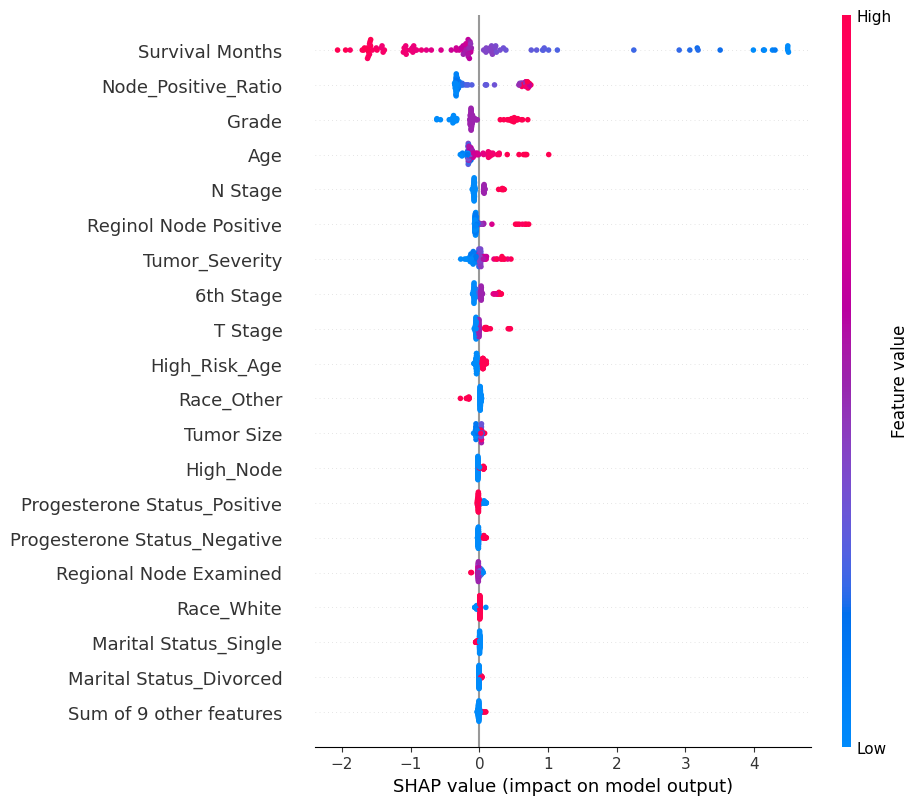

In [73]:
# Initialize SHAP explainer for CatBoost model
explainer = shap.TreeExplainer(cat_best.named_steps['classifier'])

# Get SHAP values for test data (100 samples for time efficiency)
sample_data = X_test_eng[:100]
shap_values = explainer(sample_data)

# Create beeswarm plot
shap.plots.beeswarm(shap_values, max_display=20)

## SHAP Beeswarm Plot Analysis for CatBoost Model

**Top Risk Factors (Higher death risk):**

1. Survival Months: Most important feature - shorter survival periods strongly predict higher death risk

2. Node_Positive_Ratio: High ratio of positive lymph nodes significantly increases risk of death

3. Grade: Higher tumor grades (less differentiated) increase death risk

4. Age: Older patients tend to have higher death risk

5. N Stage: Advanced nodal staging increases death risk

**Model Interpretation:**
- The model heavily relies on survival months and lymph node involvement for predictions.
- Tumor characteristics (grade, stage, size) are moderately important.
- Demographic features (age, race, marital status) have minimal impact.
- The engineered features (Node_Positive_Ratio, Tumor_Severity) are among the top ten predictors, validating the feature engineering approach.

## Final Insights

**Best model for risk prediction:**
- CatBoost Classifier (ENN Resampled)

**Key Performance Metrics:**
- ROC-AUC Score: 0.8741 (Excellent discrimination ability)
- Risk Score Separation: 50.24 points between alive and dead patients (Good seperation in general)

**Risk Score Distribution:**
- By setting the classes for risk scores into 4 categories for every 25 percent increase (25 - : Low risk / 26 ~ 50: Low-Moderate risk / 51 ~ 75: Moderate-High risk / 75 + : High risk).
- Alive Patients: Average risk = 12.67 (Low risk category)
- Dead Patients: Average risk = 62.91 (Moderate-high risk category)

**Conclusion:**

The CatBoost model demonstrates excellent performance for breast cancer survival risk assessment. With an ROC-AUC score of 87.41%, the model can reliably distinguish between patients who may likely survive versus those at higher risk of death. These findings may lead to personalized treatment and lead to prioritized decision-making for risk patients.